# Happiness Score

1.Project Description

The World Happiness Report is a pioneering survey that ranks countries by their levels of happiness, providing insight into the factors that contribute to well-being around the world. With the help of experts across various fields, this report highlights how measurements of well-being can be used to assess a nation's progress. The report also introduces the concept of Dystopia, an imaginary country that represents the world's least happy people, to provide a benchmark against which all other countries can be compared.

With this problem, we can gain a deeper understanding of the determinants of happiness and explore the role of data in shaping policy-making decisions.

In this project, we will analyze the dataset provided by the report and build a model to predict happiness scores based on various factors such as GDP per capita, family, life expectancy, freedom, generosity, and trust in government corruption.

1.1 # Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

1.2 # Importing Dataset

In [2]:
df = pd.read_csv("happiness_score.csv")
df

Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561         0.04884                   1.30232  1.40223   
2              7.527         0.03328                   1.32548  1.36058   
3              7.522         0.03880                   1.45900  1.33095   
4              7.427         0.03553                   1.32629  1.32261   
..               ...             ...                       ...      ...   
153            3.465         0.03464                   0.22208  0.77370   
154            3.340         0.03656                   0.28665  0.35386   
155            3.006         0.05015                   0.66320  0.47489   
156            2.905         0.08658                   0.01530  0.41587   
157            2.839         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726  

[158 rows x 12 columns]

In [3]:
df.head(15)

Country                           Region  Happiness Rank  \
0     Switzerland                   Western Europe               1   
1         Iceland                   Western Europe               2   
2         Denmark                   Western Europe               3   
3          Norway                   Western Europe               4   
4          Canada                    North America               5   
5         Finland                   Western Europe               6   
6     Netherlands                   Western Europe               7   
7          Sweden                   Western Europe               8   
8     New Zealand        Australia and New Zealand               9   
9       Australia        Australia and New Zealand              10   
10         Israel  Middle East and Northern Africa              11   
11     Costa Rica      Latin America and Caribbean              12   
12        Austria                   Western Europe              13   
13         Mexico      Latin America and Caribbean              14   
14  United States                    North America              15   

    Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0             7.587         0.03411                   1.39651  1.34951   
1             7.561         0.04884                   1.30232  1.40223   
2             7.527         0.03328                   1.32548  1.36058   
3             7.522         0.03880                   1.45900  1.33095   
4             7.427         0.03553                   1.32629  1.32261   
5             7.406         0.03140                   1.29025  1.31826   
6             7.378         0.02799                   1.32944  1.28017   
7             7.364         0.03157                   1.33171  1.28907   
8             7.286         0.03371                   1.25018  1.31967   
9             7.284         0.04083                   1.33358  1.30923   
10            7.278         0.03470                   1.22857  1.22393   
11            7.226         0.04454                   0.95578  1.23788   
12            7.200         0.03751                   1.33723  1.29704   
13            7.187         0.04176                   1.02054  0.91451   
14            7.119         0.03839                   1.39451  1.24711   

    Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                    0.94143  0.66557                        0.41978   
1                    0.94784  0.62877                        0.14145   
2                    0.87464  0.64938                        0.48357   
3                    0.88521  0.66973                        0.36503   
4                    0.90563  0.63297                        0.32957   
5                    0.88911  0.64169                        0.41372   
6                    0.89284  0.61576                        0.31814   
7                    0.91087  0.65980                        0.43844   
8                    0.90837  0.63938                        0.42922   
9                    0.93156  0.65124                        0.35637   
10                   0.91387  0.41319                        0.07785   
11                   0.86027  0.63376                        0.10583   
12                   0.89042  0.62433                        0.18676   
13                   0.81444  0.48181                        0.21312   
14                   0.86179  0.54604                        0.15890   

    Generosity  Dystopia Residual  
0      0.29678            2.51738  
1      0.43630            2.70201  
2      0.34139            2.49204  
3      0.34699            2.46531  
4      0.45811            2.45176  
5      0.23351            2.61955  
6      0.47610            2.46570  
7      0.36262            2.37119  
8      0.47501            2.26425  
9      0.43562            2.26646  
10     0.33172            3.08854  
11     0.25497            3.17728  
12     0.33088            2.53320  
13     0.14074            3.60214  
14     0.40

In [4]:
df.tail(15)

Country                           Region  \
143                     Niger               Sub-Saharan Africa   
144                  Cambodia                Southeastern Asia   
145                  Tanzania               Sub-Saharan Africa   
146                Madagascar               Sub-Saharan Africa   
147  Central African Republic               Sub-Saharan Africa   
148                      Chad               Sub-Saharan Africa   
149                    Guinea               Sub-Saharan Africa   
150               Ivory Coast               Sub-Saharan Africa   
151              Burkina Faso               Sub-Saharan Africa   
152               Afghanistan                    Southern Asia   
153                    Rwanda               Sub-Saharan Africa   
154                     Benin               Sub-Saharan Africa   
155                     Syria  Middle East and Northern Africa   
156                   Burundi               Sub-Saharan Africa   
157                      Togo               Sub-Saharan Africa   

     Happiness Rank  Happiness Score  Standard Error  \
143             144            3.845         0.03602   
144             145            3.819         0.05069   
145             146            3.781         0.05061   
146             147            3.681         0.03633   
147             148            3.678         0.06112   
148             149            3.667         0.03830   
149             150            3.656         0.03590   
150             151            3.655         0.05141   
151             152            3.587         0.04324   
152             153            3.575         0.03084   
153             154            3.465         0.03464   
154             155            3.340         0.03656   
155             156            3.006         0.05015   
156             157            2.905         0.08658   
157             158            2.839         0.06727   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
143                   0.06940  0.77265                   0.29707  0.47692   
144                   0.46038  0.62736                   0.61114  0.66246   
145                   0.28520  1.00268                   0.38215  0.32878   
146                   0.20824  0.66801                   0.46721  0.19184   
147                   0.07850  0.00000                   0.06699  0.48879   
148                   0.34193  0.76062                   0.15010  0.23501   
149                   0.17417  0.46475                   0.24009  0.37725   
150                   0.46534  0.77115                   0.15185  0.46866   
151                   0.25812  0.85188                   0.27125  0.39493   
152                   0.31982  0.30285                   0.30335  0.23414   
153                   0.22208  0.77370                   0.42864  0.59201   
154                   0.28665  0.35386                   0.31910  0.48450   
155                   0.66320  0.47489                   0.72193  0.15684   
156                   0.01530  0.41587                   0.22396  0.11850   
157                   0.20868  0.13995                   0.28443  0.36453   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
143                        0.15639     0.19387            1.87877  
144                        0.07247     0.40359            0.98195  
145                        0.05747     0.34377            1.38079  
146                        0.08124     0.21333            1.85100  
147                        0.08289     0.23835            2.72230  
148                        0.05269     0.18386            1.94296  
149                        0.12139     0.28657            1.99172  
150                        0.17922     0.20165            1.41723  
151                        0.12832     0.21747            1.46494  
152                        0.09719     0.36510            1.95210  
153                        0.55191     0.22628            0.67042  
154                

In [5]:
# Lets check the dimension of the dataset

df.shape

(158, 12)

Here we can see there is 158 rows and 12 columns in which 1 is target and rest is independent variables.

1.3 # EDA(Exploratory Data Analysis)

In [6]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [7]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

There are three different types of data present in this dataset i.e. int64(1), float64(9), object(2)

In [8]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:>

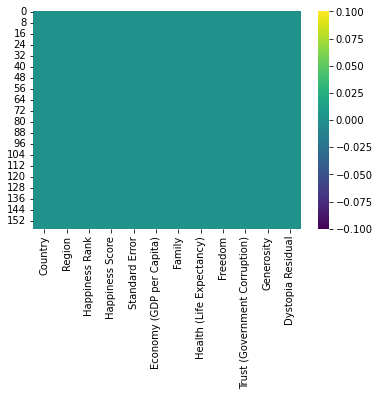

In [9]:
# Lets visualize null values by heatmap

sns.heatmap(df.isnull(), cmap='viridis')

There is no null values present

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

This gives brief information about the dataset which inclues columns name, non-null values, dtypes,index range, and memory usage.

In [11]:
# check for the value counts of all columns

for col in df.columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for Country:
Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


Value counts for Region:
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


Value counts for Happiness Rank:
82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64


Value counts for Happiness Score:
5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833 

In [12]:
# loop through each column and print unique values
for col in df.columns:
    print(f"Unique values in {col}:")
    print(df[col].unique())

Unique values in Country:
['Switzerland' 'Iceland' 'Denmark' 'Norway' 'Canada' 'Finland'
 'Netherlands' 'Sweden' 'New Zealand' 'Australia' 'Israel' 'Costa Rica'
 'Austria' 'Mexico' 'United States' 'Brazil' 'Luxembourg' 'Ireland'
 'Belgium' 'United Arab Emirates' 'United Kingdom' 'Oman' 'Venezuela'
 'Singapore' 'Panama' 'Germany' 'Chile' 'Qatar' 'France' 'Argentina'
 'Czech Republic' 'Uruguay' 'Colombia' 'Thailand' 'Saudi Arabia' 'Spain'
 'Malta' 'Taiwan' 'Kuwait' 'Suriname' 'Trinidad and Tobago' 'El Salvador'
 'Guatemala' 'Uzbekistan' 'Slovakia' 'Japan' 'South Korea' 'Ecuador'
 'Bahrain' 'Italy' 'Bolivia' 'Moldova' 'Paraguay' 'Kazakhstan' 'Slovenia'
 'Lithuania' 'Nicaragua' 'Peru' 'Belarus' 'Poland' 'Malaysia' 'Croatia'
 'Libya' 'Russia' 'Jamaica' 'North Cyprus' 'Cyprus' 'Algeria' 'Kosovo'
 'Turkmenistan' 'Mauritius' 'Hong Kong' 'Estonia' 'Indonesia' 'Vietnam'
 'Turkey' 'Kyrgyzstan' 'Nigeria' 'Bhutan' 'Azerbaijan' 'Pakistan' 'Jordan'
 'Montenegro' 'China' 'Zambia' 'Romania' 'Serbia' 'P

# Description of Dataset

In [13]:
# Statistical description of numerical column

df.describe()

Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%                    0.910245    1.029510                  0.696705   
75%                    1.158448    1.214405                  0.811013   
max                    1.690420    1.402230                  1.025250   

          Freedom  Trust (Government Corruption)  Generosity  \
count  158.000000                     158.000000  158.000000   
mean     0.428615                       0.143422    0.237296   
std      0.150693                       0.120034    0.126685   
min      0.000000                       0.000000    0.000000   
25%      0.328330                       0.061675    0.150553   
50%      0.435515                       0.107220    0.216130   
75%      0.549092                       0.180255    0.309883   
max      0.669730                       0.551910    0.795880   

       Dystopia Residual  
count         158.000000  
mean            2.098977  
std             0.553550  
min             0.328580  
25%             1.759410  
50%             2.095415  
75%             2.462415  
max             3.602140

This summary statistics include the count, mean, standard deviation, minimum value, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum value for each variable. The count shows the number of non-null values, while the other statistics provide information about the distribution of the variable.

1.Count: This shows the number of non-null values in each column of the dataset. In this case, there are 158 observations for each column.

2.Mean: This represents the average value of each column, calculated by adding up all the values in the column and dividing by the total number of observations.

3.Standard deviation: This measures the spread of the data in each column. A high standard deviation indicates that the values in the column are more spread out from the mean, while a low standard deviation indicates that the values are more tightly clustered around the mean.

4.Minimum value: This is the smallest value in each column.

5.25th percentile: This is the value below which 25% of the data falls in each column. It is also known as the first quartile.

6.50th percentile: This is the value that falls in the middle of each column when the data is sorted in ascending or descending order. It is also known as the second quartile or the 50th percentile.

7.75th percentile: This is the value below which 75% of the data falls in each column. It is also known as the third quartile.

8.Maximum value: This is the largest value in each column.

# Data Visualization- Graphical Analysis

Unvariate Analysis

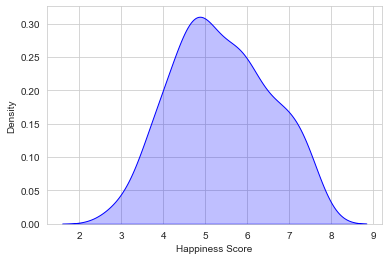

In [14]:
# lets analyze the happiness score column by density plot

sns.set_style("whitegrid")
sns.kdeplot(df["Happiness Score"], shade=True, color="blue")
plt.show()

This graph shows that the 'Happiness Score' distribution is approximately normal with a peak around 4.9. We can also see that the density plot is symmetric around the peak, indicating that the 'Happiness Score' is roughly evenly distributed.

The shape of the distribution also suggests that the majority of countries in the dataset have a happiness score between 4 and 7, with fewer countries having scores below 4 or above 7. 

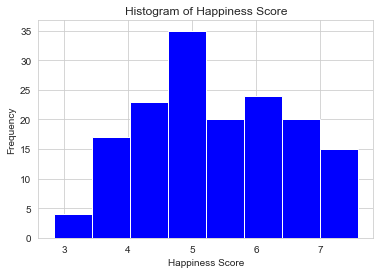

In [15]:
# lets analyze the happiness score column by histogram plot

plt.hist(df['Happiness Score'], bins=8, color='b')
plt.title('Histogram of Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

From this histogram, we can see that the majority of the countries have a happiness score between 4.0 and 6.0, with the highest frequency of countries having a happiness score between 4.5 and 5.5. We can see evenly distribution here in this plot.

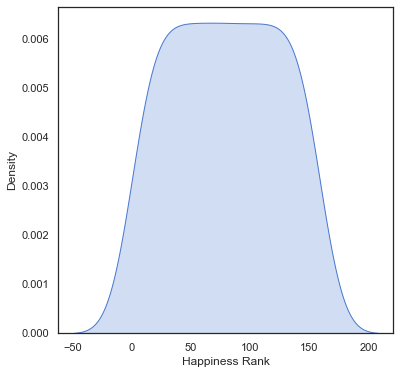

In [16]:
# lets analyze the happiness rank column by density plot

sns.set(style='white', palette='muted', color_codes=True)
plt.figure(figsize=(6,6))
sns.kdeplot(df['Happiness Rank'], shade=True, color='b')
plt.show()

The blue shaded area under the curve represents the density of the data.

In this specific plot, we can see that the distribution of the 'Happiness Rank' is bimodal, with two peaks around ranks 50 and 140, indicating that there may be two groups of countries with different happiness rankings.

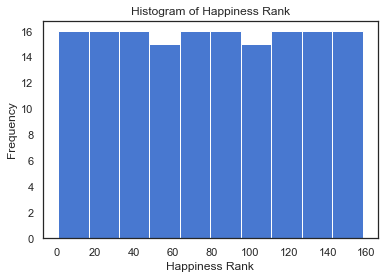

In [17]:
# lets analyze the happiness rank column by histogram plot

plt.hist(df['Happiness Rank'], bins=10, color='b')
plt.title('Histogram of Happiness Rank')
plt.xlabel('Happiness Rank')
plt.ylabel('Frequency')
plt.show()

This plot shows that the distribution of happiness ranks is fairly evenly spread out, with a slight bump in the middle. There are no major outliers or extreme values.

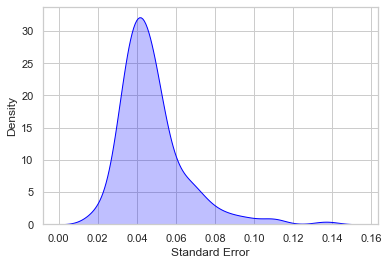

In [18]:
# lets analyze the standard error column by density plot

sns.set_style("whitegrid")
sns.kdeplot(df["Standard Error"], shade=True, color="blue")
plt.show()

Here in this plot we can see distribution is positively skewed. Can see majorly data is distributed between 0.02 to 0.08 and peak 0.042.

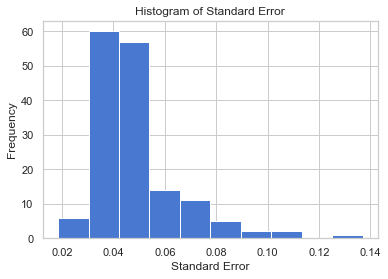

In [19]:
# lets analyze the standard error column by histogram plot

plt.hist(df['Standard Error'], bins=10, color='b')
plt.title('Histogram of Standard Error')
plt.xlabel('Standard Error')
plt.ylabel('Frequency')
plt.show()

This plot appears to be skewed to the right, with most of the values concentrated between 0.03 and 0.05 and a few outliers towards the right.

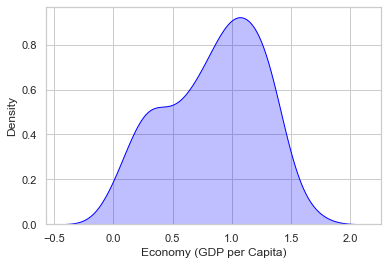

In [20]:
# lets analyze the economy(GDP per capita) column by density plot

sns.set_style("whitegrid")
sns.kdeplot(df['Economy (GDP per Capita)'], shade=True, color='blue')
plt.show()

Here in this plot we can see a slightly negative skeweness in the distribution. We can also see the peak at 1.2.

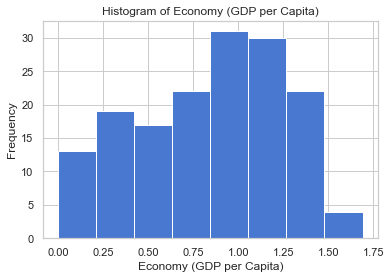

In [21]:
# lets analyze the economy(GDP per capita) column by histogram plot

plt.hist(df['Economy (GDP per Capita)'], bins=8, color='b')
plt.title('Histogram of Economy (GDP per Capita)')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Frequency')
plt.show()

The histogram shows that the distribution is slightly left-skewed, meaning that the majority of the countries have lower GDP per capita values.

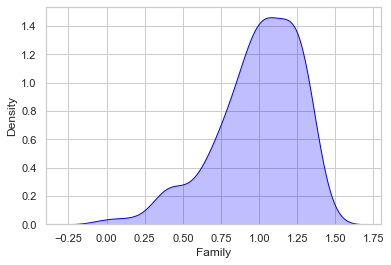

In [22]:
# lets analyze the family column by density plot

sns.set_style("whitegrid")
sns.kdeplot(df['Family'], shade=True, color='blue')
plt.show()

Here we can see left-skewed distribution with majorly distribution at 0.75 to 1.30

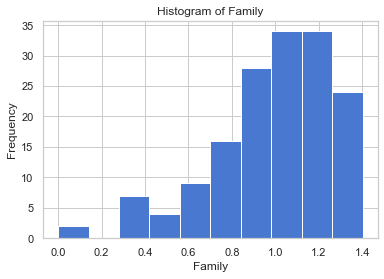

In [23]:
# lets analyze the family column by histogram plot

plt.hist(df['Family'], bins=10, color='b')
plt.title('Histogram of Family')
plt.xlabel('Family')
plt.ylabel('Frequency')
plt.show()

Here in this plot we can see the distribution of the 'Family' column which appears to be negatively skewed. This means that there are more observations with higher values and fewer observations with lower values.
The majority of the observations falling between 0.8 and 1.2, also we can observe some outliers 

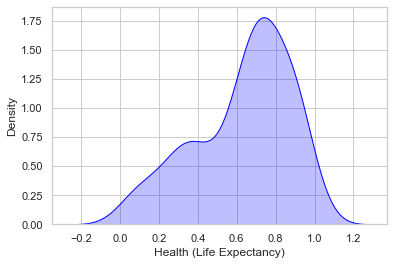

In [24]:
# lets analyze the health(Life Expectancy) column by density plot

sns.set_style("whitegrid")
sns.kdeplot(df['Health (Life Expectancy)'], shade=True, color='blue')
plt.show()

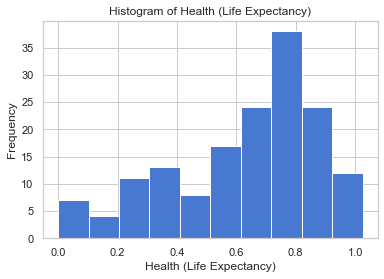

In [25]:
# lets analyze the health(Life expectancy) column by histogram plot

plt.hist(df['Health (Life Expectancy)'], bins=10, color='b')
plt.title('Histogram of Health (Life Expectancy)')
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Frequency')
plt.show()

Here, in this plot too we can see data is negatively skewed

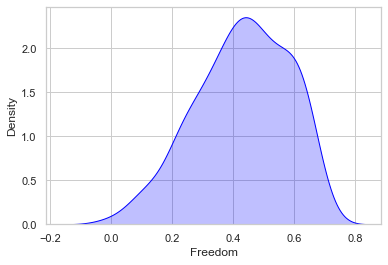

In [26]:
# lets analyze the freedom column by density plot

sns.set_style("whitegrid")
sns.kdeplot(df['Freedom'], shade=True, color='blue')
plt.show()

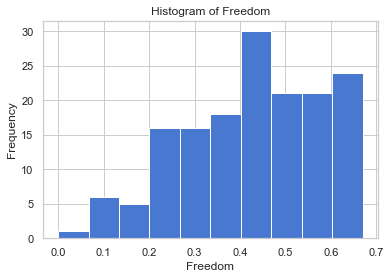

In [27]:
# lets analyze the freedom column by histogram plot

plt.hist(df['Freedom'], bins=10, color='b')
plt.title('Histogram of Freedom')
plt.xlabel('Freedom')
plt.ylabel('Frequency')
plt.show()

This plot shows that the distribution of the data is relatively uniform, with a slight peak towards the right side. The majority of the data falls between 0.3-0.6 on the x-axis.

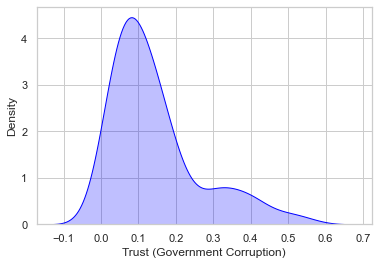

In [28]:
# lets analyze the Trust(Government corruption) column by density plot

sns.set_style("whitegrid")
sns.kdeplot(df['Trust (Government Corruption)'], shade=True, color='blue')
plt.show()

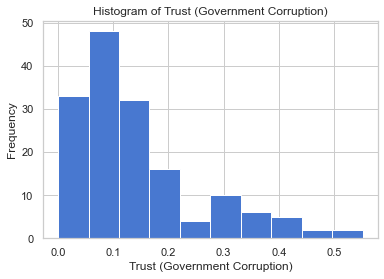

In [29]:
# lets analyze the Trust(Government corruption) column by histogram plot

plt.hist(df['Trust (Government Corruption)'], bins=10, color='b')
plt.title('Histogram of Trust (Government Corruption)')
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Frequency')
plt.show()

This plot shows the distribution is positively skewed. The majority of data falls between 0.0 to 0.2 on the x-axis

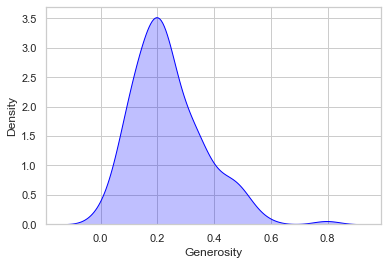

In [30]:
# lets analyze the Generosity column by density plot

sns.set_style("whitegrid")
sns.kdeplot(df['Generosity'],shade=True, color='blue')
plt.show()

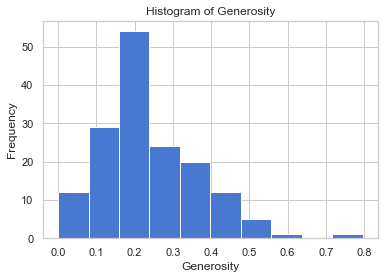

In [31]:
# lets analyze the Generosity column by histogram plot

plt.hist(df['Generosity'], bins=10, color='b')
plt.title('Histogram of Generosity')
plt.xlabel('Generosity')
plt.ylabel('Frequency')
plt.show()

This plot shows their is slightly postive skewness can be seen with few outliers in the distribution. The majority of data falls between 0.1 to 0.4 of x-axis.

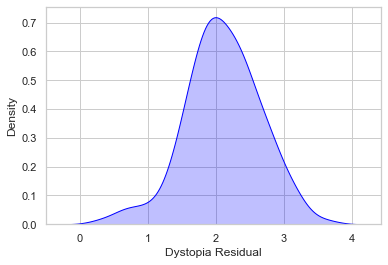

In [32]:
# lets analyze the Dystopia residual column by density plot

sns.set_style("whitegrid")
sns.kdeplot(df['Dystopia Residual'], shade=True, color='blue')
plt.show()

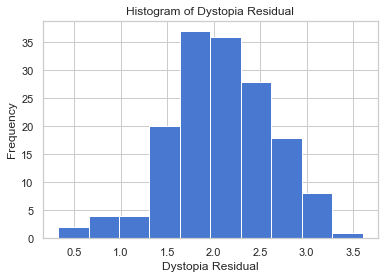

In [33]:
# lets analyze the Dystopia residual column by histogram plot

plt.hist(df['Dystopia Residual'], bins=10, color='b')
plt.title('Histogram of Dystopia Residual')
plt.xlabel('Dystopia Residual')
plt.ylabel('Frequency')
plt.show()

This plots shows symmetrical distribution, with no clear skewness. This indicates that the values are evenly distributed around the central value, with no significant outliers or bias in the data.

Lets analyze numerical column with box plots

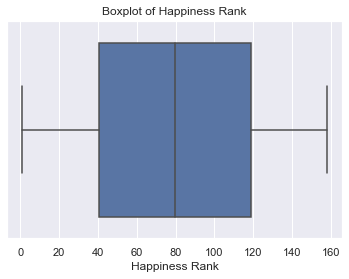

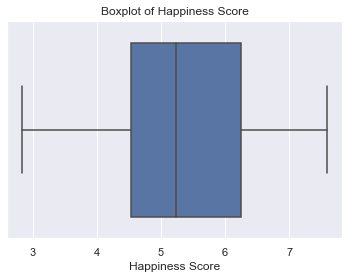

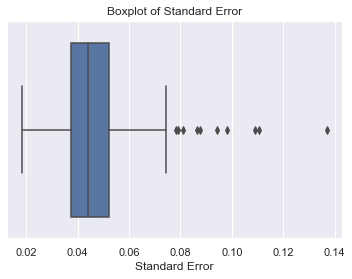

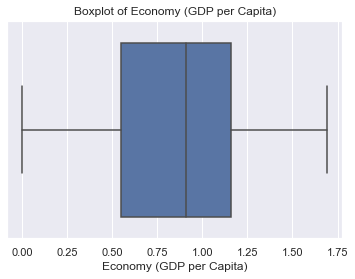

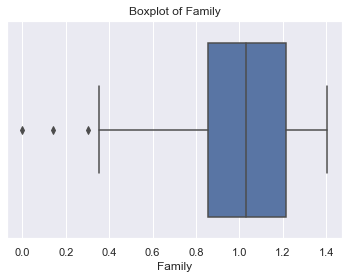

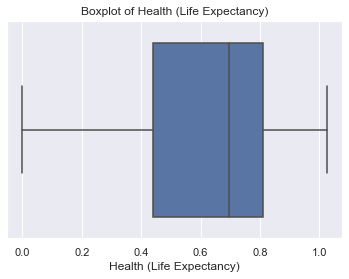

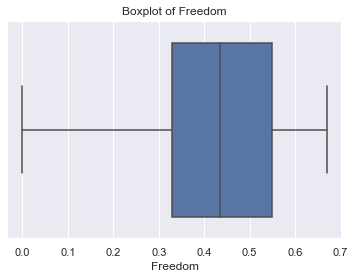

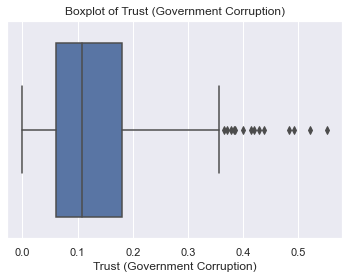

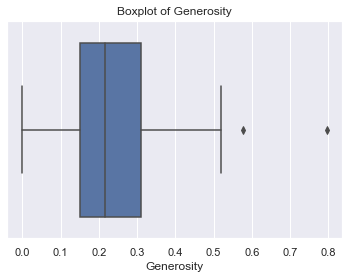

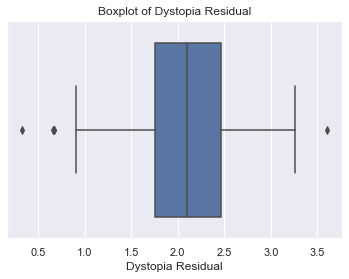

In [34]:
# analyze the numerical columns with box plot

# Set seaborn style
sns.set(style='darkgrid')

# Select only numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64'])

# Create boxplots for each column
for col in num_cols.columns:
    plt.figure()
    sns.boxplot(x=num_cols[col])
    plt.title('Boxplot of ' + col)
    plt.xlabel(col)


Here in all these plots we can see presence of outliers in few columns. And we can also see the skewness in the distribution.

 lets analyze the categorical columns now

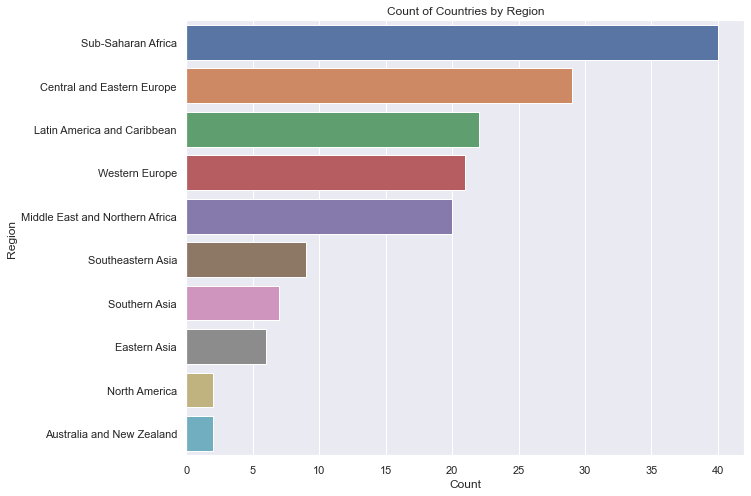

In [35]:
# creating count plot here to check the distribution of countries by region
sns.set_style("darkgrid")

plt.figure(figsize=(10, 8))
sns.countplot(y='Region', data=df, order=df['Region'].value_counts().index)
plt.title('Count of Countries by Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()


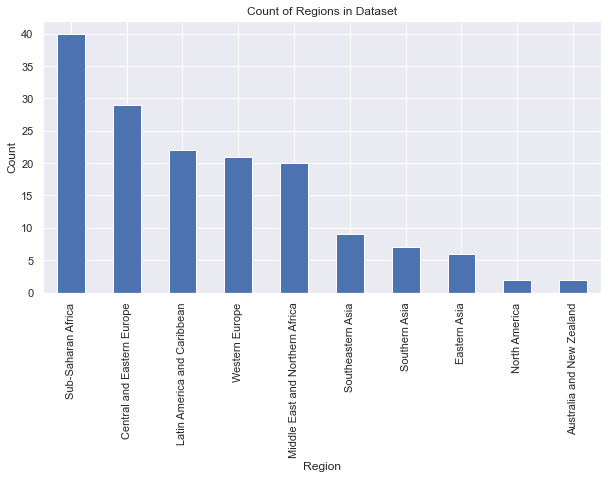

In [36]:
# Create a bar plot of the count of each region
df['Region'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Count of Regions in Dataset')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

Here we can see the counts of sub-saharan africa region  has highest count followed by central and eastern europe and latin america and carribean

Bivariate Analysis

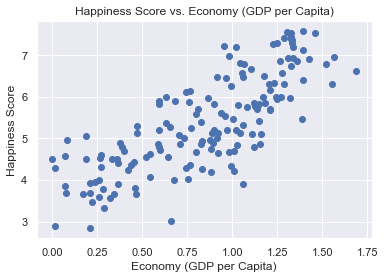

In [37]:
# Comparing Happiness score vs Economy(GDP per capita) by scatter plot

plt.scatter(df['Economy (GDP per Capita)'], df['Happiness Score'])
plt.title('Happiness Score vs. Economy (GDP per Capita)')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.show()

This  scatter plot shows that there is a positive but slightly weak relationship between the two variables, indicating that countries with higher GDP per capita is having higher happiness scores. This plot also shows some outliers.

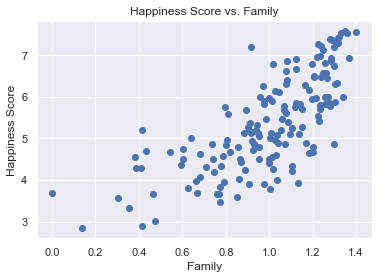

In [38]:
# Comparing Happiness Score vs Family by scatter plot

plt.scatter(df['Family'], df['Happiness Score'])
plt.title('Happiness Score vs. Family')
plt.xlabel('Family')
plt.ylabel('Happiness Score')
plt.show()

This scatter plot shows that there is a positive correlation between Family and Happiness Score. Countries with higher Family values tend to have higher Happiness Scores. The plot also shows that there are some outliers.

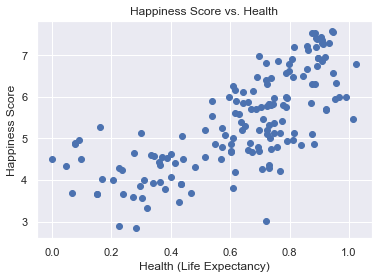

In [39]:
# Comparing Happiness Score vs Health by Scatter plot

plt.scatter(df['Health (Life Expectancy)'], df['Happiness Score'])
plt.title('Happiness Score vs. Health')
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Happiness Score')
plt.show()

This scatter plot also shows a positive but slightly weak correlation. And we can see few outliers but negligible.

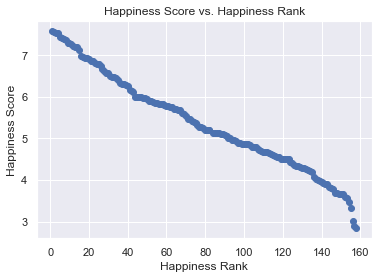

In [40]:
# Comparing Happiness score vs happiness rank by scatter plot

plt.scatter(df['Happiness Rank'], df['Happiness Score'])
plt.title('Happiness Score vs. Happiness Rank')
plt.xlabel('Happiness Rank')
plt.ylabel('Happiness Score')
plt.show()

This plot shows non-linear negative relationship between happiness score and happiness rank

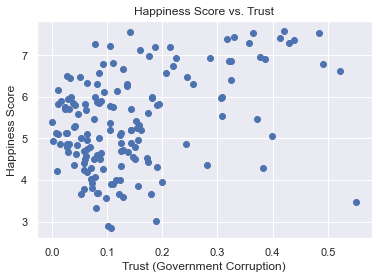

In [41]:
# Comparing Happiness Score vs Trust(Government Corruption) by scatter plot

plt.scatter(df['Trust (Government Corruption)'], df['Happiness Score'])
plt.title('Happiness Score vs. Trust')
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Happiness Score')
plt.show()

Here in this plot we can see there is null relationship between the variables, as the points are scattered without any manner. There are outliers we can see here

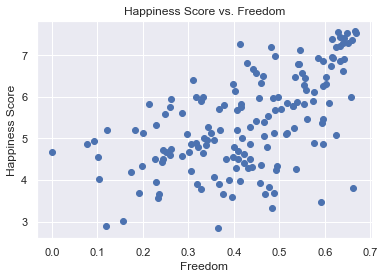

In [42]:
# Comparing Happiness score vs freedom by scatter plot

plt.scatter(df['Freedom'], df['Happiness Score'])
plt.title('Happiness Score vs. Freedom')
plt.xlabel('Freedom')
plt.ylabel('Happiness Score')
plt.show()

Here in this plot we can see a positve relationship between variables.

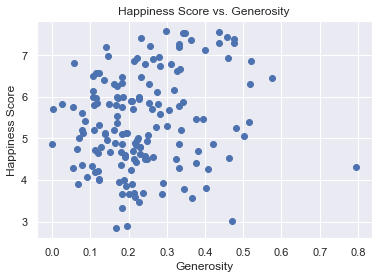

In [43]:
# Comparing Happiness score vs Generosity by scatter plot

plt.scatter(df['Generosity'], df['Happiness Score'])
plt.title('Happiness Score vs. Generosity')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.show()

Here we can see null relationship between variables here with outliers present.

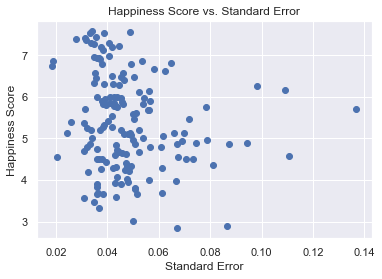

In [44]:
# Comparing Happiness Score vs Standard error by scatter plot

plt.scatter(df['Standard Error'], df['Happiness Score'])
plt.title('Happiness Score vs. Standard Error')
plt.xlabel('Standard Error')
plt.ylabel('Happiness Score')
plt.show()

Here also we can see null relationship with outliers present

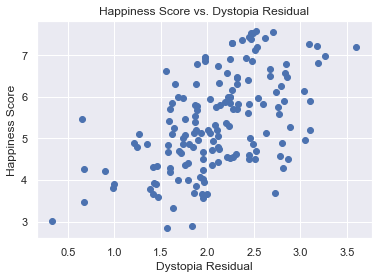

In [45]:
# Comparing Happiness Score vs Dystopia Residual bt scatter plot

plt.scatter(df['Dystopia Residual'], df['Happiness Score'])
plt.title('Happiness Score vs. Dystopia Residual')
plt.xlabel('Dystopia Residual')
plt.ylabel('Happiness Score')
plt.show()

Here in this plot we can see weak positive relationship  between variables here, with few outliers

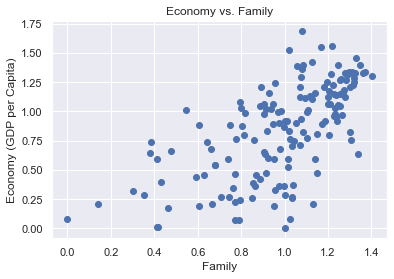

In [46]:
# Comparing Economy vs Family bt scatter plot

plt.scatter(df['Family'], df['Economy (GDP per Capita)'])
plt.title('Economy vs. Family')
plt.xlabel('Family')
plt.ylabel('Economy (GDP per Capita)')
plt.show()

Here in this plot we can see the positive relationship between family and economy variables

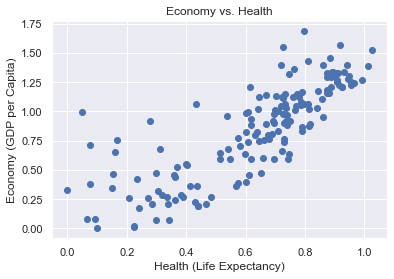

In [47]:
# Comparing Economy vs health(Life Expectancy) by scatter plot

plt.scatter(df['Health (Life Expectancy)'], df['Economy (GDP per Capita)'])
plt.title('Economy vs. Health')
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Economy (GDP per Capita)')
plt.show()

Positive relationship we can see here in this plot

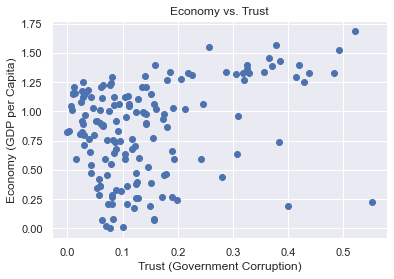

In [48]:
# Comparing Economy vs Trust bt scatter plot

plt.scatter(df['Trust (Government Corruption)'], df['Economy (GDP per Capita)'])
plt.title('Economy vs. Trust')
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Economy (GDP per Capita)')
plt.show()

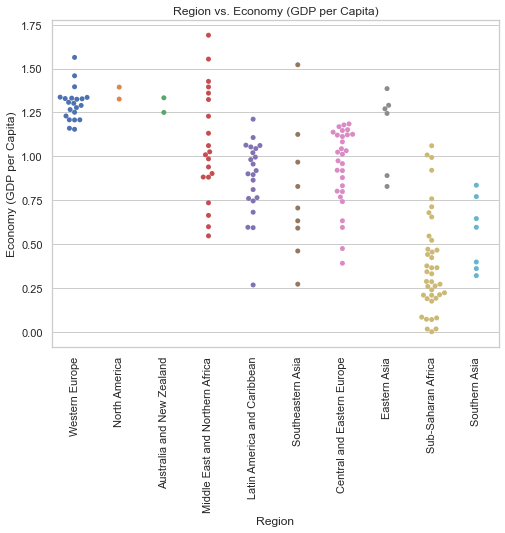

In [49]:
# Comparing Region vs Economy (GDP per Capita) by swarm plot

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

ax = sns.swarmplot(x="Region", y="Economy (GDP per Capita)", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Region")
ax.set_ylabel("Economy (GDP per Capita)")
ax.set_title("Region vs. Economy (GDP per Capita)")
plt.show()

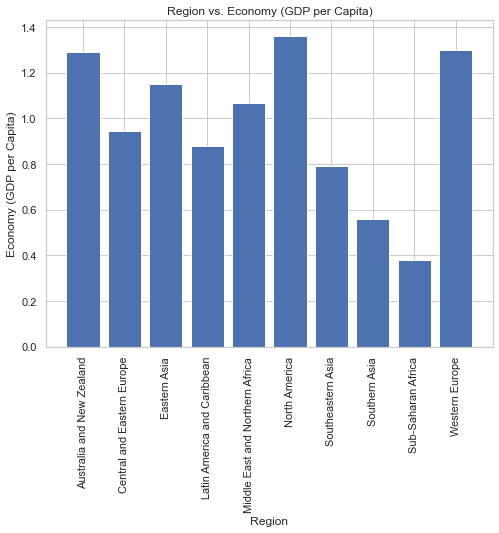

In [50]:
# Comparing Region vs Economy (GDP per Capita) by bar plot

economy_by_region = df.groupby("Region")["Economy (GDP per Capita)"].mean()

plt.figure(figsize=(8, 6))
plt.bar(economy_by_region.index, economy_by_region.values)
plt.xticks(rotation=90)
plt.xlabel("Region")
plt.ylabel("Economy (GDP per Capita)")
plt.title("Region vs. Economy (GDP per Capita)")
plt.show()

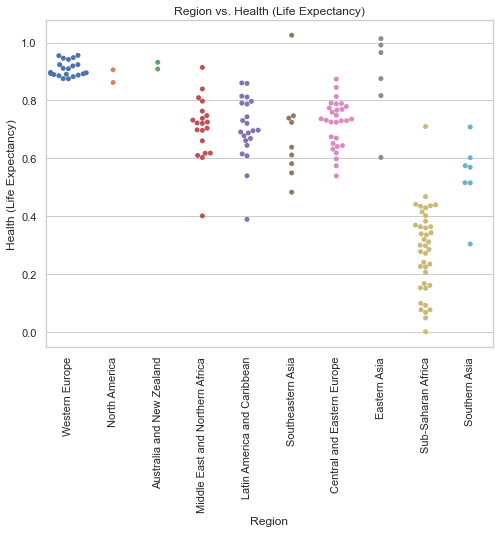

In [51]:
# Comparing region vs health variables by swarm plot and bar plot

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

ax = sns.swarmplot(x="Region", y="Health (Life Expectancy)", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Region")
ax.set_ylabel("Health (Life Expectancy)")
ax.set_title("Region vs. Health (Life Expectancy)")
plt.show()

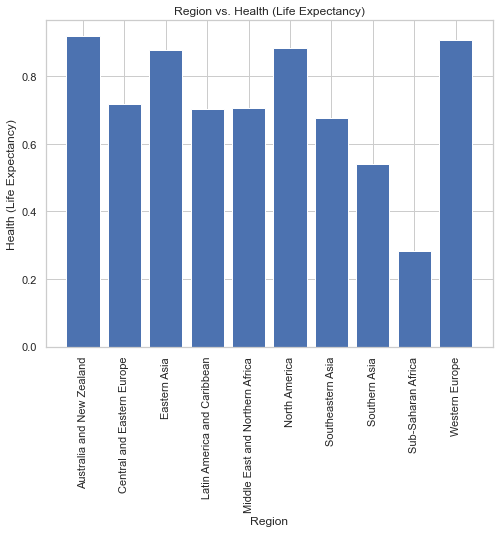

In [52]:
health_by_region = df.groupby("Region")["Health (Life Expectancy)"].mean()

plt.figure(figsize=(8, 6))
plt.bar(health_by_region.index, health_by_region.values)
plt.xticks(rotation=90)
plt.xlabel("Region")
plt.ylabel("Health (Life Expectancy)")
plt.title("Region vs. Health (Life Expectancy)")
plt.show()

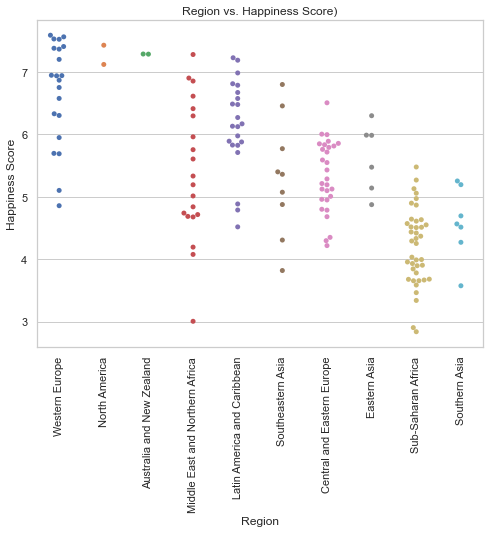

In [53]:
# Comparing Region vs happiness score by swarm plot and bar plot

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

ax = sns.swarmplot(x="Region", y="Happiness Score", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Region")
ax.set_ylabel("Happiness Score")
ax.set_title("Region vs. Happiness Score)")
plt.show()

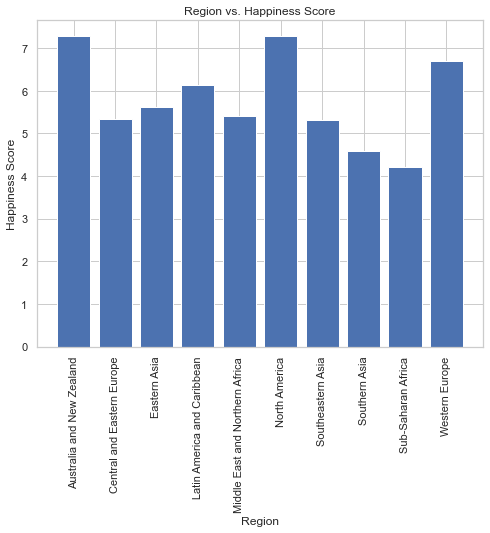

In [54]:
happiness_score_by_region = df.groupby("Region")["Happiness Score"].mean()

plt.figure(figsize=(8, 6))
plt.bar(happiness_score_by_region.index, happiness_score_by_region.values)
plt.xticks(rotation=90)
plt.xlabel("Region")
plt.ylabel("Happiness Score")
plt.title("Region vs. Happiness Score")
plt.show()

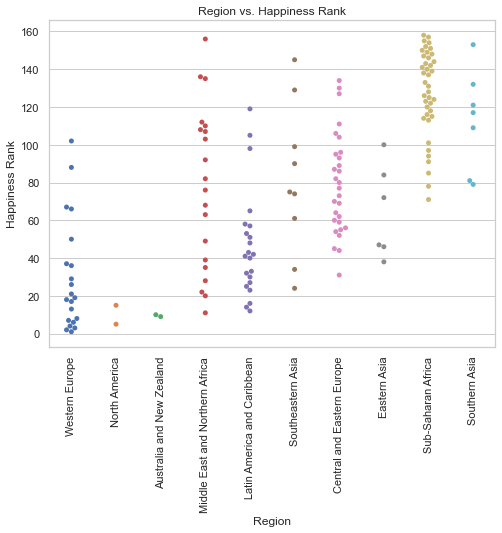

In [55]:
# Comparing Region vs Happiness rank by swarm plot and bar plot

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

ax = sns.swarmplot(x="Region", y="Happiness Rank", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Region")
ax.set_ylabel("Happiness Rank")
ax.set_title("Region vs. Happiness Rank")
plt.show()

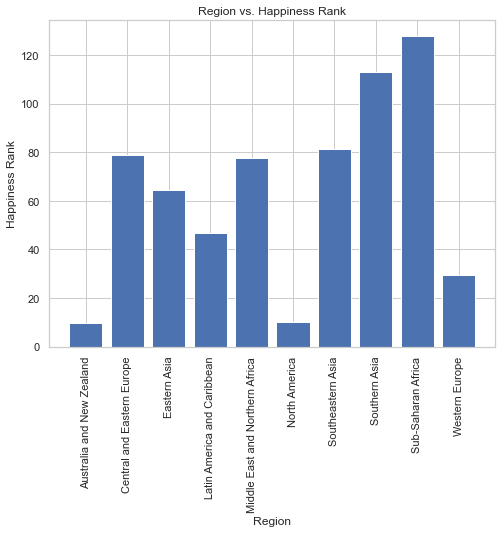

In [56]:
happiness_rank_by_region = df.groupby("Region")["Happiness Rank"].mean()

plt.figure(figsize=(8, 6))
plt.bar(happiness_rank_by_region.index, happiness_rank_by_region.values)
plt.xticks(rotation=90)
plt.xlabel("Region")
plt.ylabel("Happiness Rank")
plt.title("Region vs. Happiness Rank")
plt.show()

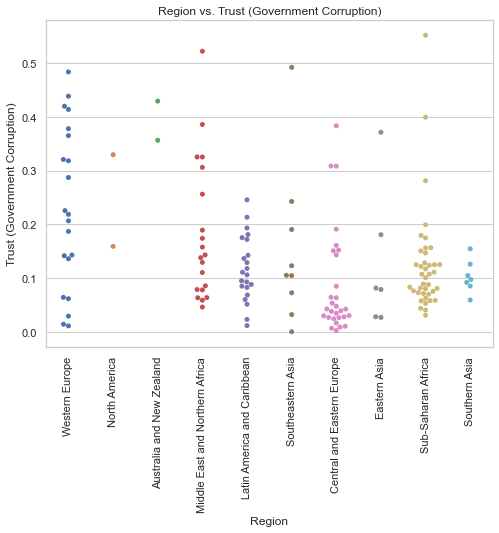

In [57]:
# Comparing Region vs Trust(Government Corruption) by swarm plot and bar plot

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

ax = sns.swarmplot(x="Region", y="Trust (Government Corruption)", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Region")
ax.set_ylabel("Trust (Government Corruption)")
ax.set_title("Region vs. Trust (Government Corruption)")
plt.show()

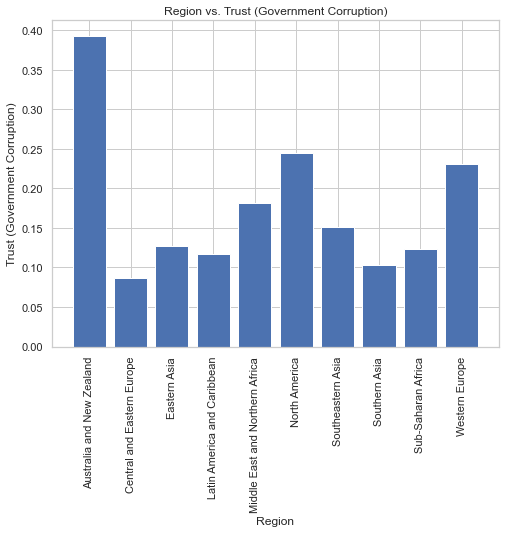

In [58]:
trust_by_region = df.groupby("Region")["Trust (Government Corruption)"].mean()

plt.figure(figsize=(8, 6))
plt.bar(trust_by_region.index, trust_by_region.values)
plt.xticks(rotation=90)
plt.xlabel("Region")
plt.ylabel("Trust (Government Corruption)")
plt.title("Region vs. Trust (Government Corruption)")
plt.show()

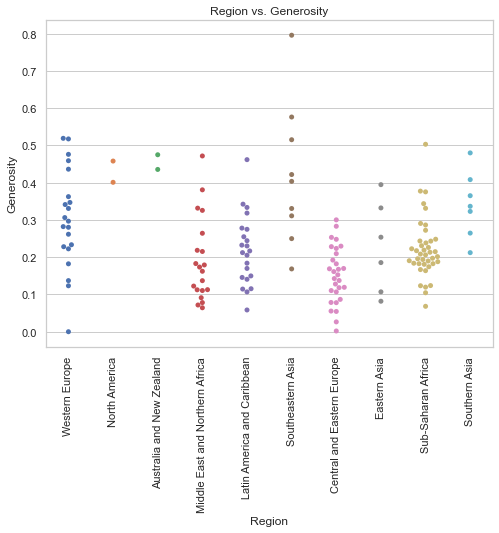

In [59]:
# Comparing Region vs Generosity by swarm plot and bar plot

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

ax = sns.swarmplot(x="Region", y="Generosity", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Region")
ax.set_ylabel("Generosity")
ax.set_title("Region vs. Generosity")
plt.show()

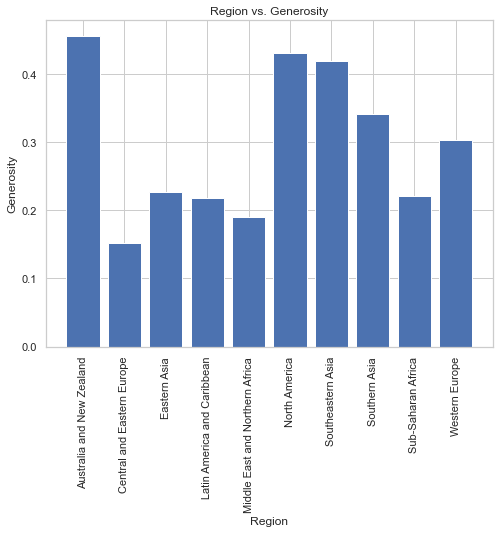

In [60]:
generosity_by_region = df.groupby("Region")["Generosity"].mean()

plt.figure(figsize=(8, 6))
plt.bar(generosity_by_region.index, generosity_by_region.values)
plt.xticks(rotation=90)
plt.xlabel("Region")
plt.ylabel("Generosity")
plt.title("Region vs. Generosity")
plt.show()

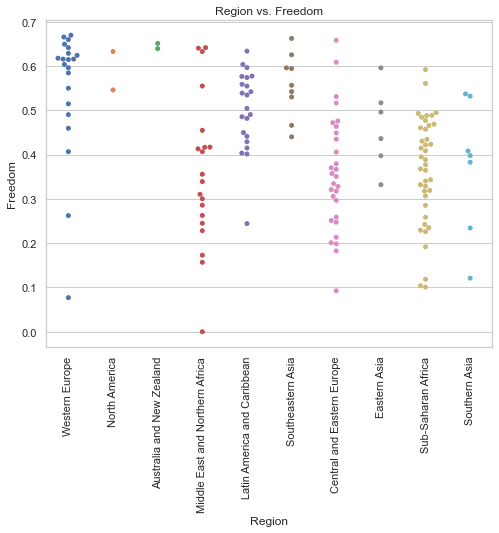

In [61]:
# Comparing Region vs Freedom by swarm plot and bar plot

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

ax = sns.swarmplot(x="Region", y="Freedom", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Region")
ax.set_ylabel("Freedom")
ax.set_title("Region vs. Freedom")
plt.show()

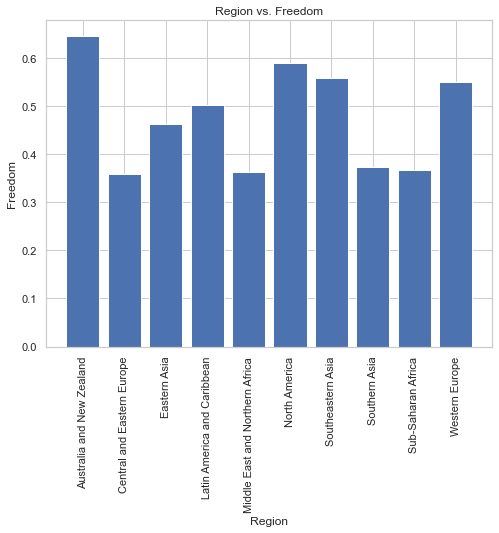

In [62]:
freedom_by_region = df.groupby("Region")["Freedom"].mean()

plt.figure(figsize=(8, 6))
plt.bar(freedom_by_region.index, freedom_by_region.values)
plt.xticks(rotation=90)
plt.xlabel("Region")
plt.ylabel("Freedom")
plt.title("Region vs. Freedom")
plt.show()

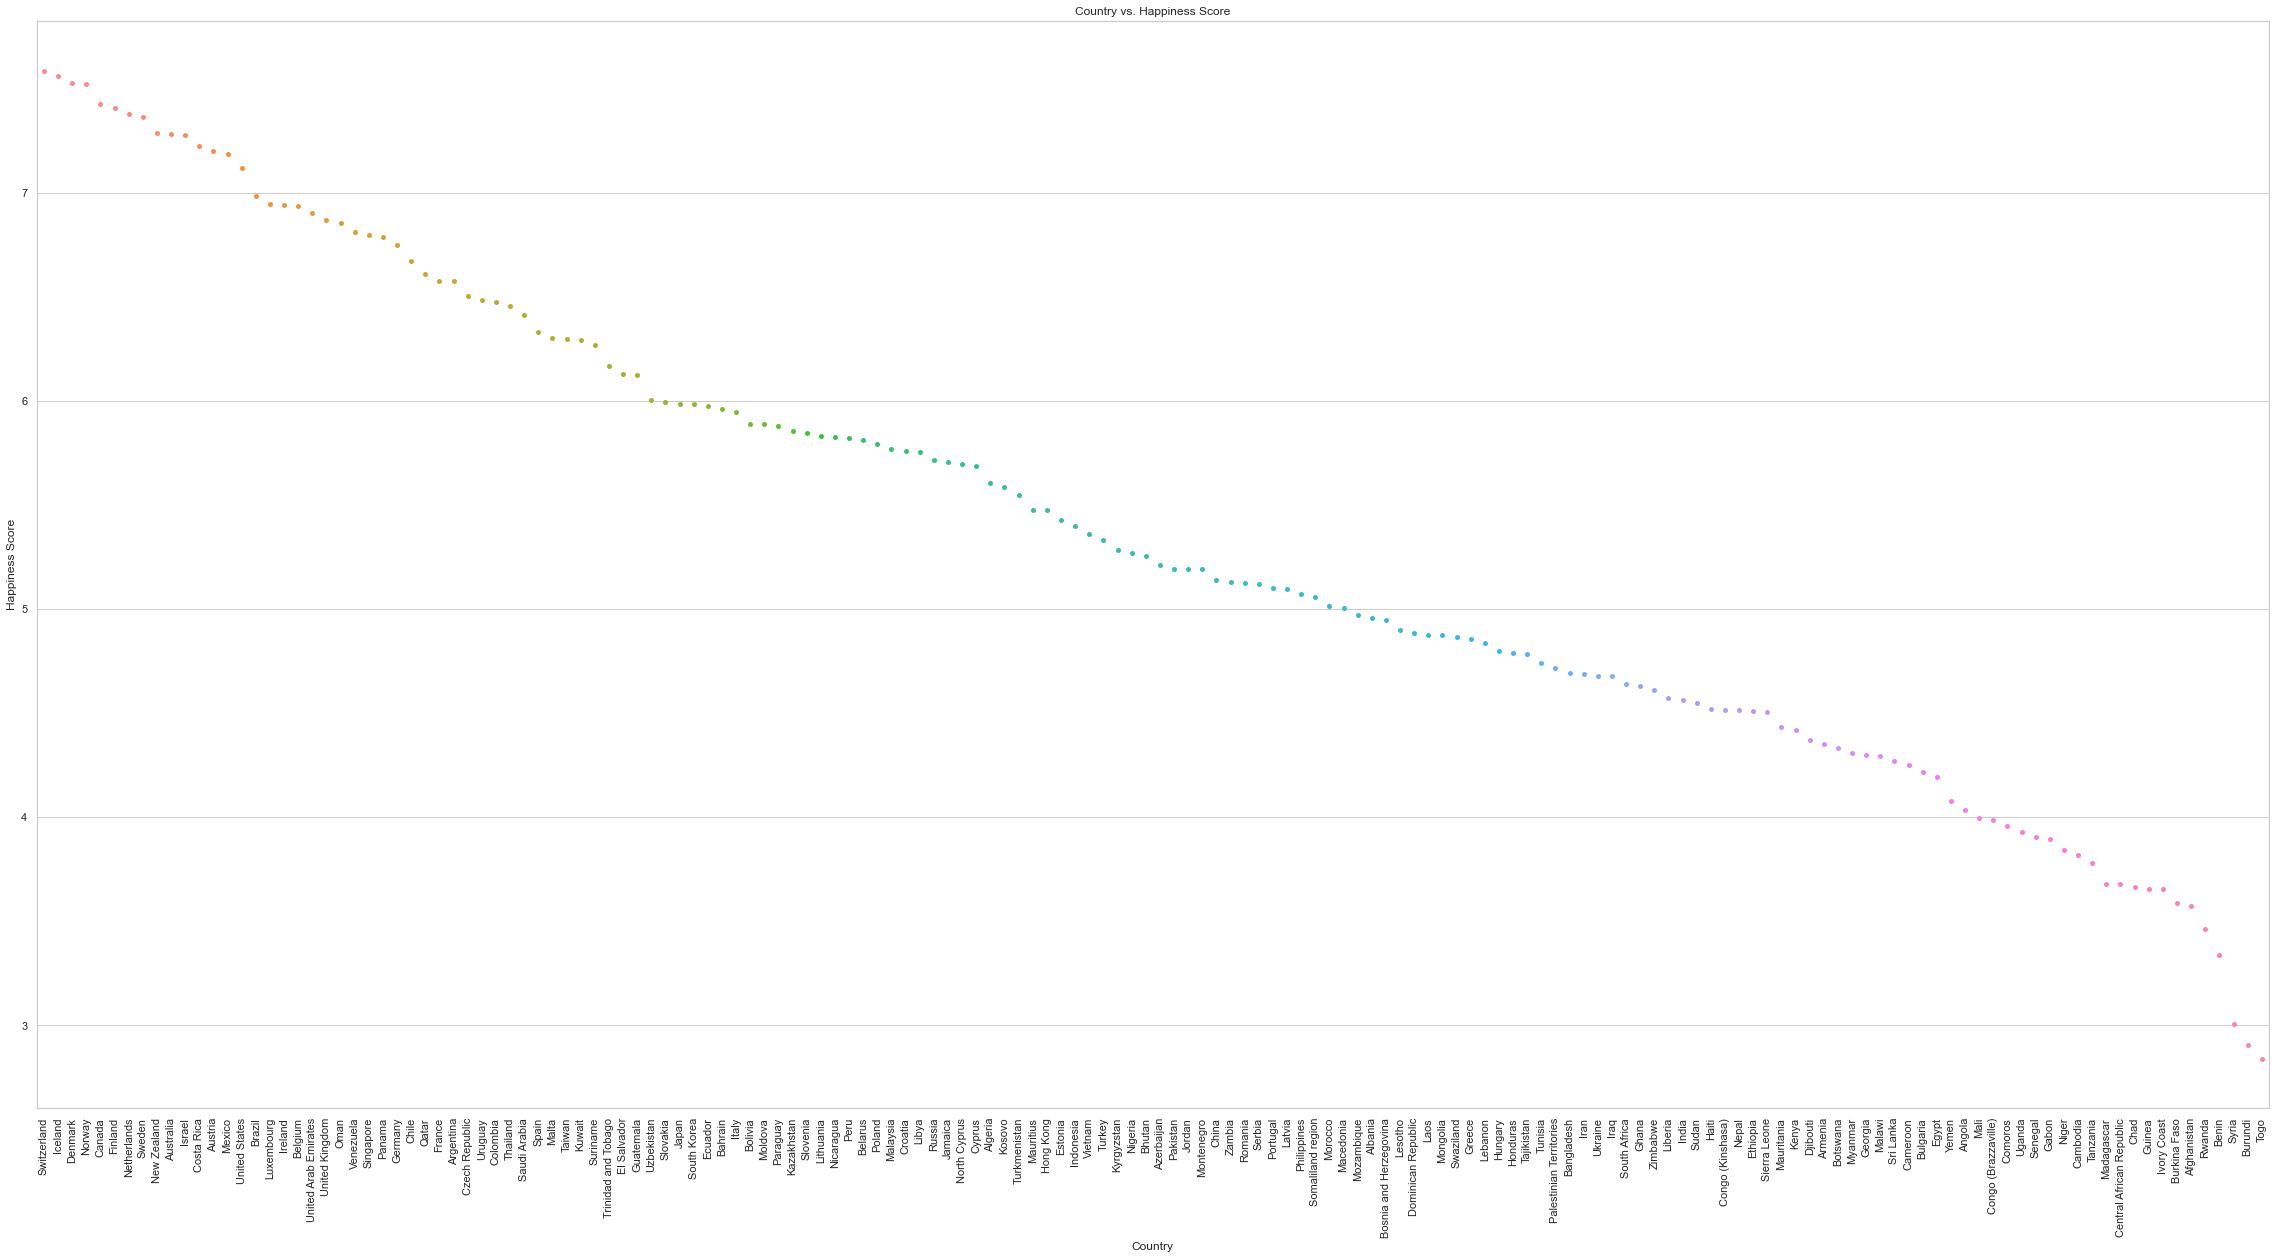

In [63]:
# Comparing country vs happiness score by swarm plot and bar plot

sns.set(style="whitegrid")
plt.figure(figsize=(40, 20))

ax = sns.swarmplot(x="Country", y="Happiness Score", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Country")
ax.set_ylabel("Happiness Score")
ax.set_title("Country vs. Happiness Score")
plt.show()

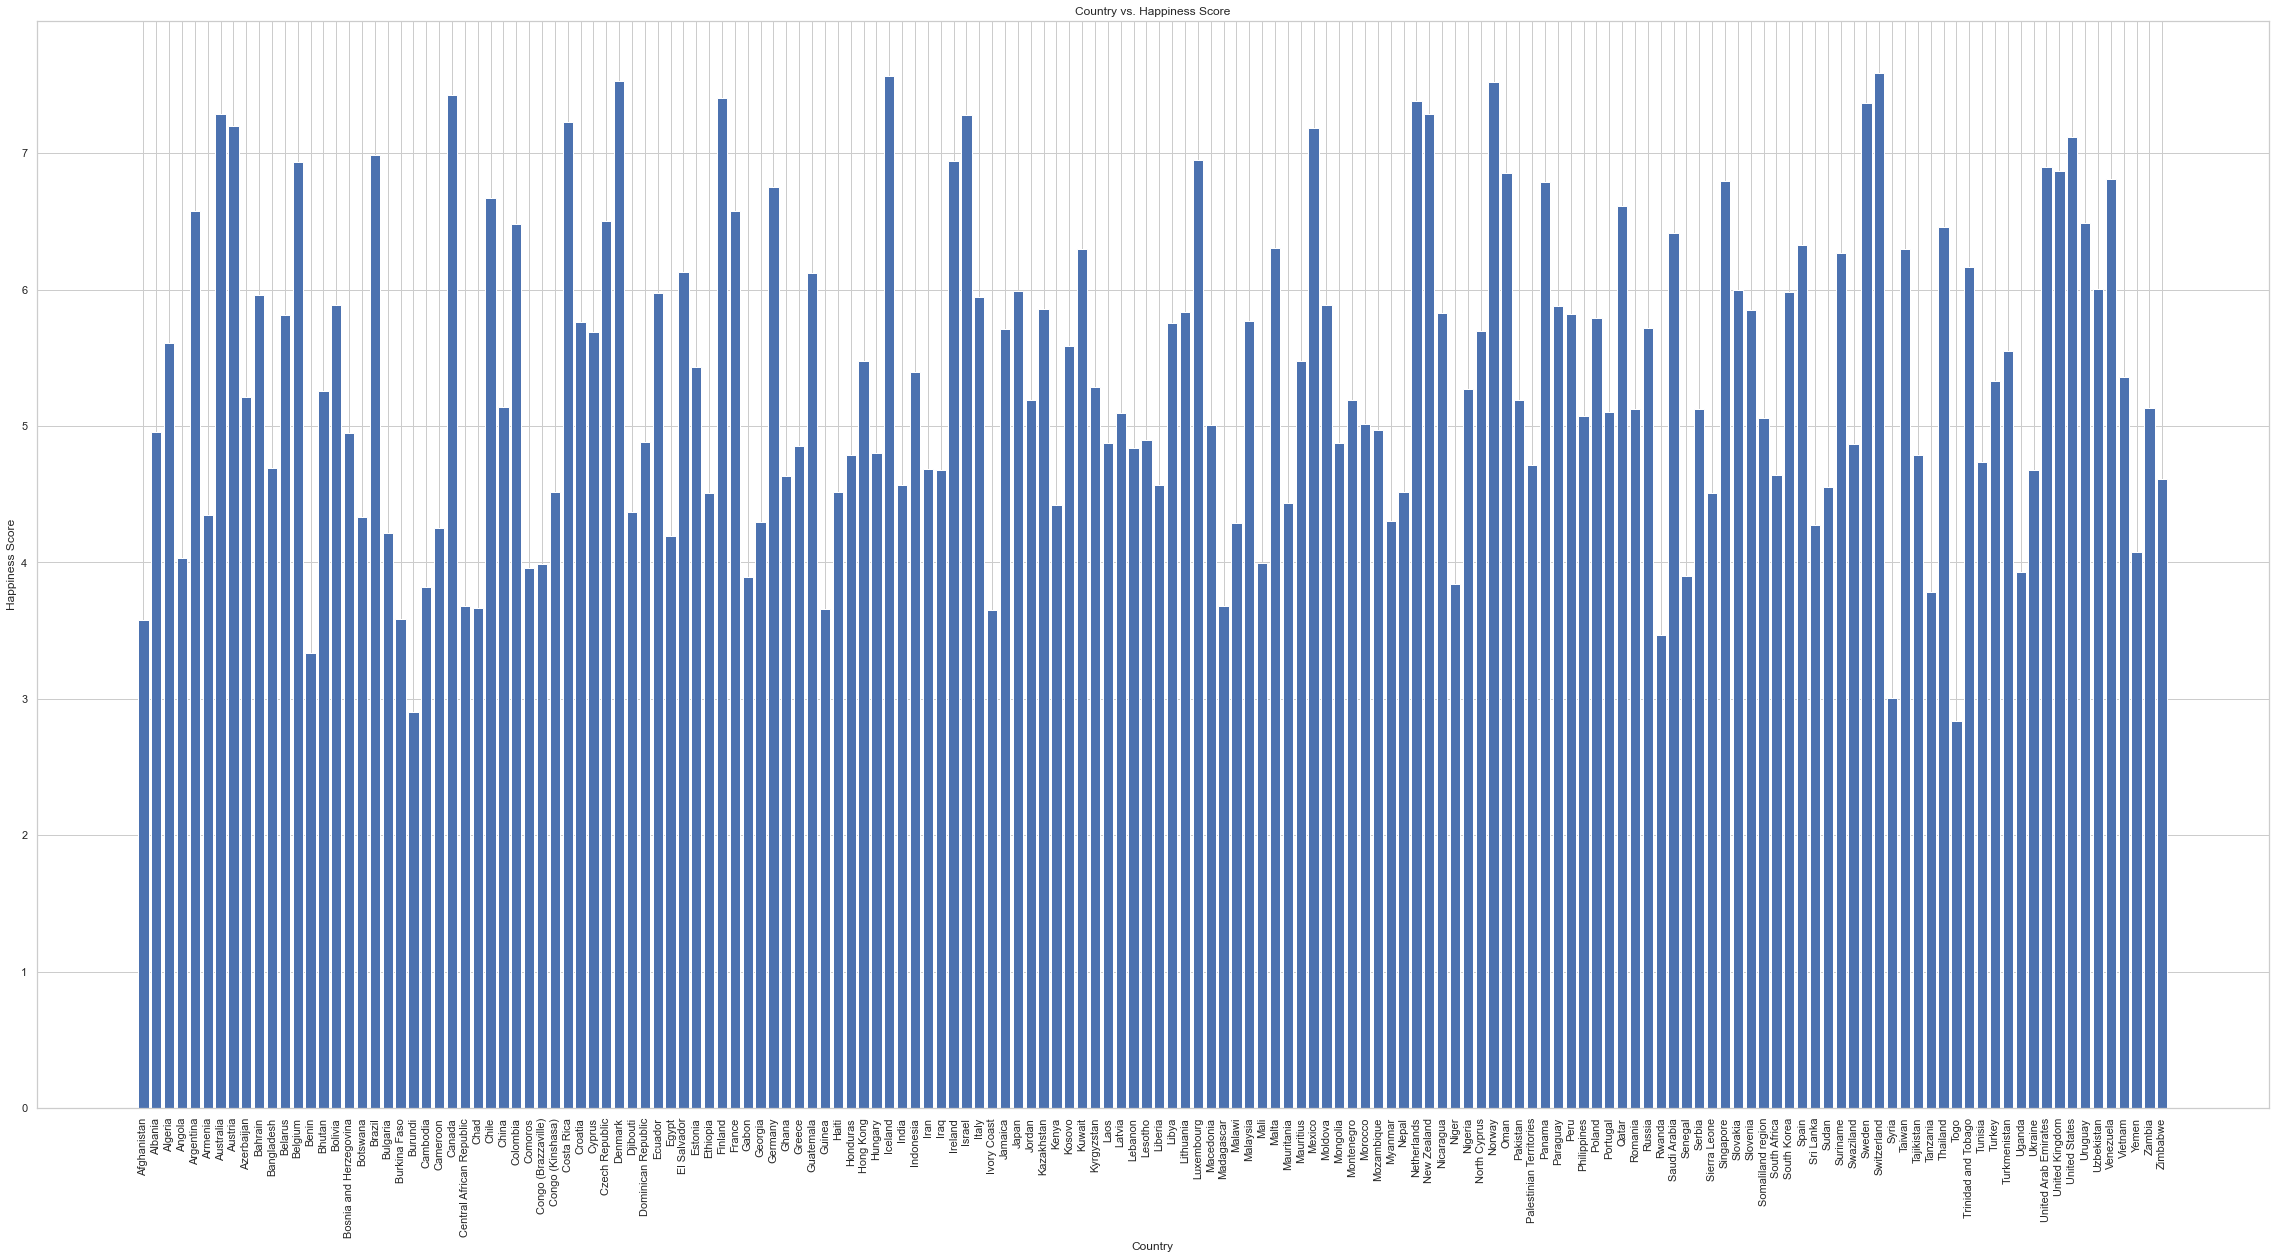

In [64]:
happiness_score_by_country = df.groupby("Country")["Happiness Score"].mean()

plt.figure(figsize=(40, 20))
plt.bar(happiness_score_by_country.index, happiness_score_by_country.values)
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.title("Country vs. Happiness Score")
plt.show()

Multivariate Analysis

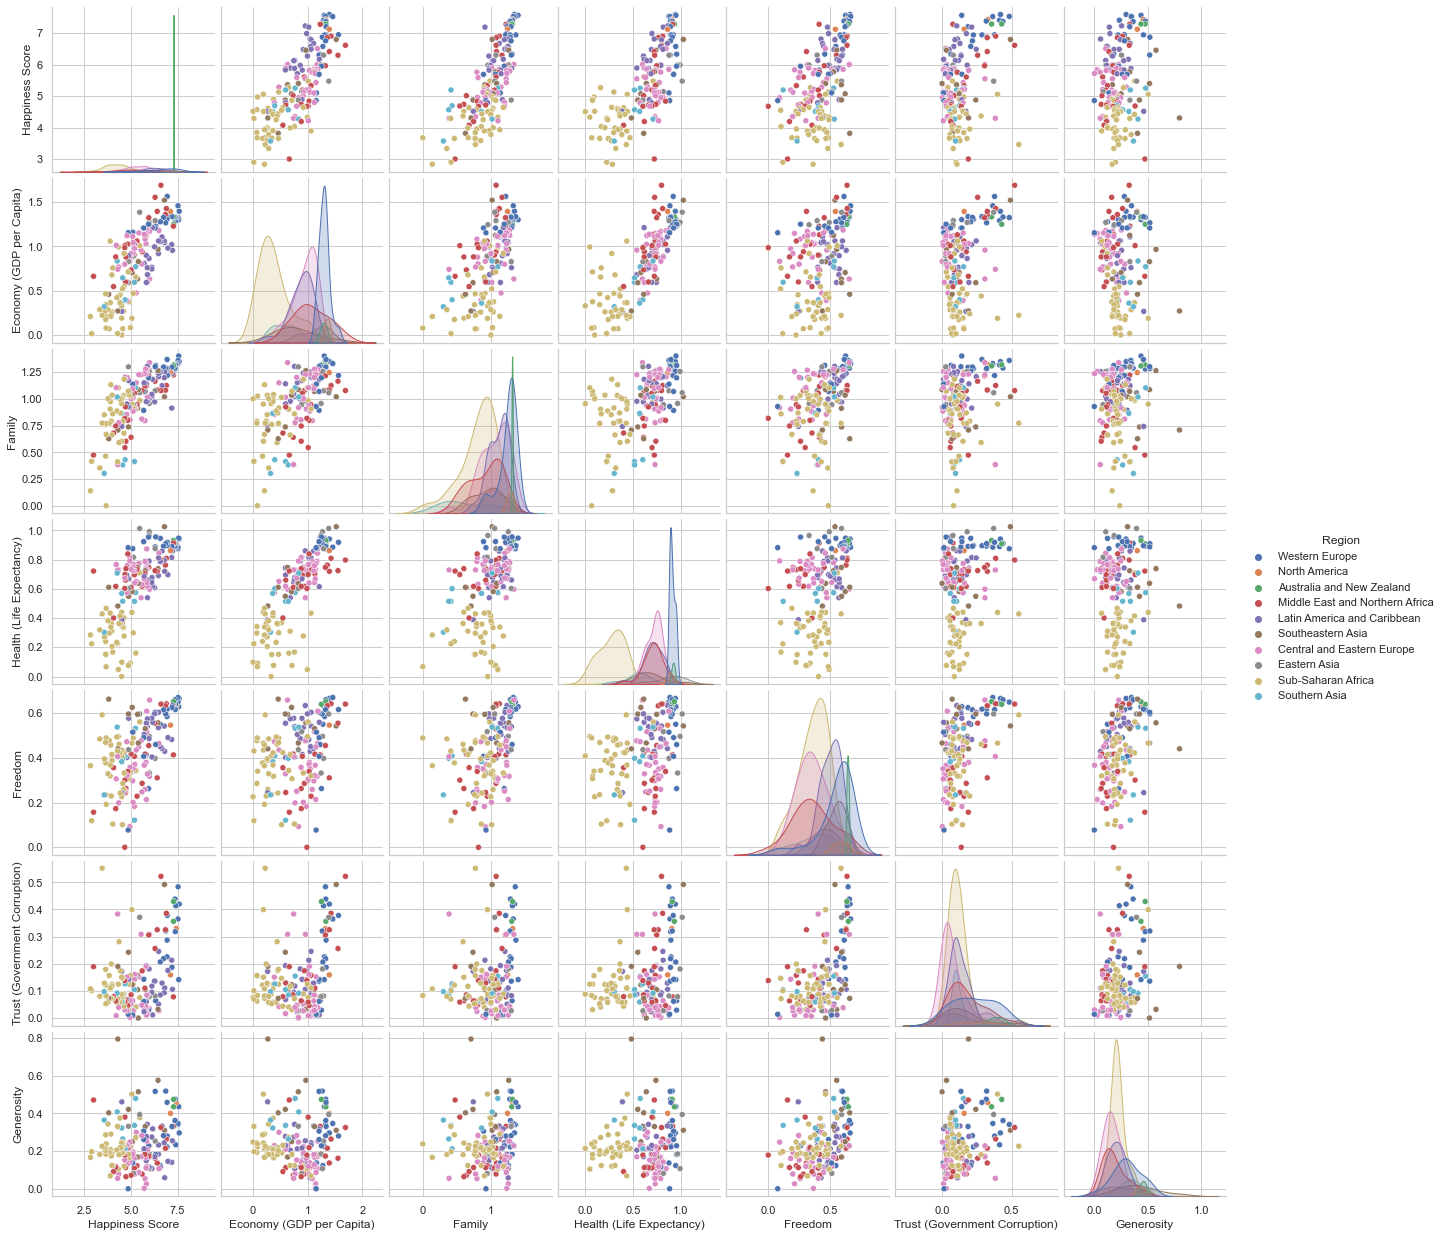

In [65]:
sns.pairplot(data=df, vars=["Happiness Score", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity"], hue="Region")
plt.show()

Here in in pair plot we can see the distribution of data among different variables

# Checking Outliers

Checking outliers by plotting histogram

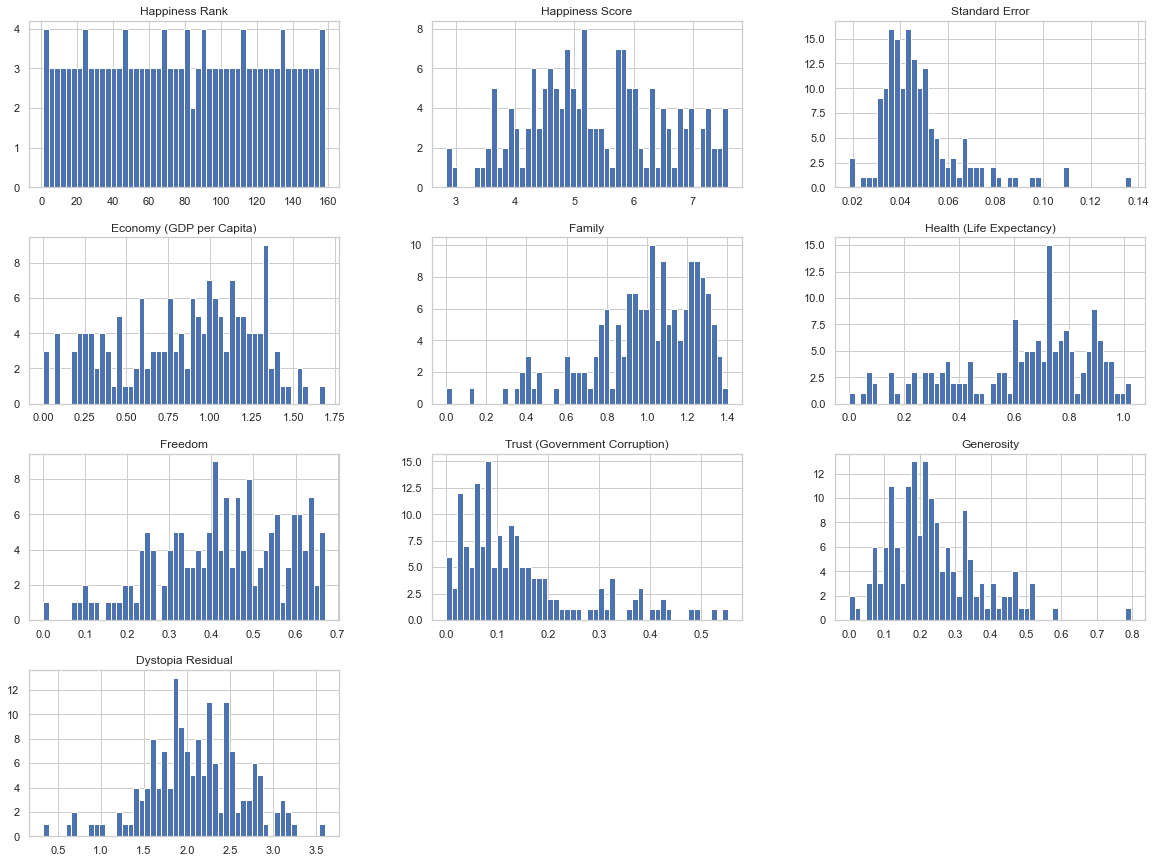

In [66]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [67]:
from scipy.stats.mstats import winsorize

# Select the columns that have outliers
cols_with_outliers = ['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Dystopia Residual']

# Winsorize each column separately
for col in cols_with_outliers:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])


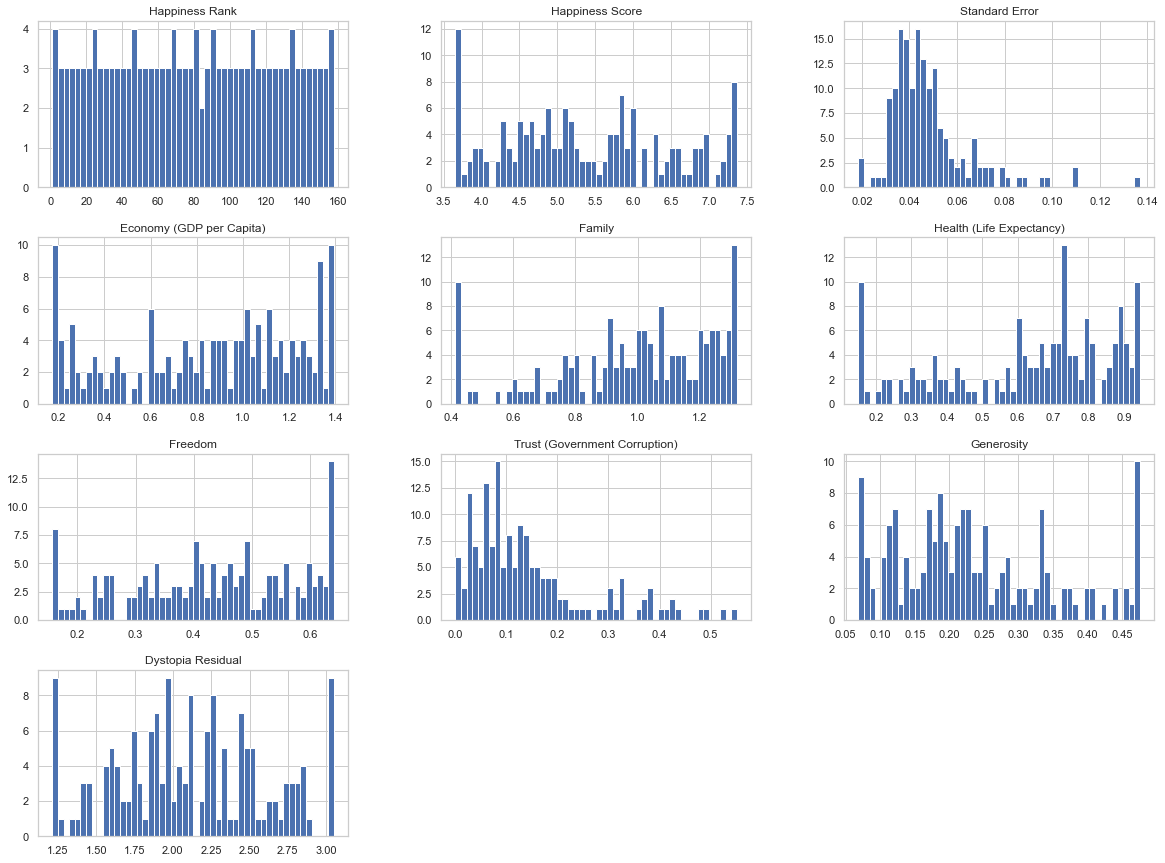

In [68]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Outliers are handled possibly.

In [69]:
df.shape

(158, 12)

In [70]:
# Checking for skewness

df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.194929
Standard Error                   1.983439
Economy (GDP per Capita)        -0.325825
Family                          -0.747263
Health (Life Expectancy)        -0.629059
Freedom                         -0.247518
Trust (Government Corruption)    1.385463
Generosity                       0.599119
Dystopia Residual                0.092281
dtype: float64

In [71]:
from scipy.stats import boxcox

# select the columns to remove skewness
cols_to_transform = [ 'Family', 'Health (Life Expectancy)', 'Generosity', 'Trust (Government Corruption)']

# apply Box-Cox transformation to each selected column
for col in cols_to_transform:
    transformed_data, lambda_value = boxcox(df[col]+1)
    df[col] = transformed_data

# check the skewness after the transformation
print(df.skew())

Happiness Rank                   0.000418
Happiness Score                  0.194929
Standard Error                   1.983439
Economy (GDP per Capita)        -0.325825
Family                          -0.173257
Health (Life Expectancy)        -0.196487
Freedom                         -0.247518
Trust (Government Corruption)    0.185965
Generosity                       0.059221
Dystopia Residual                0.092281
dtype: float64


Here we can see the skewness has been removed

In [72]:
df.shape

(158, 12)

# Encodes Categorical Columns

In [73]:
# Using one-hot encoding method

from sklearn.preprocessing import OneHotEncoder

# Define the columns to be one-hot encoded
columns_to_encode = ['Country', 'Region']
onehot_encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the data using the one-hot encoder
encoded_cols = onehot_encoder.fit_transform(df[columns_to_encode])

# Create a dataframe of the encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=onehot_encoder.get_feature_names(columns_to_encode))

# Drop the original non-encoded columns from the original dataframe
df.drop(columns_to_encode, axis=1, inplace=True)

# Concatenate the encoded dataframe with the original dataframe
df = pd.concat([df, encoded_df], axis=1)
df

Happiness Rank  Happiness Score  Standard Error  \
0                 1            7.364         0.03411   
1                 2            7.364         0.04884   
2                 3            7.364         0.03328   
3                 4            7.364         0.03880   
4                 5            7.364         0.03553   
..              ...              ...             ...   
153             154            3.655         0.03464   
154             155            3.655         0.03656   
155             156            3.655         0.05015   
156             157            3.655         0.08658   
157             158            3.655         0.06727   

     Economy (GDP per Capita)    Family  Health (Life Expectancy)  Freedom  \
0                     1.39541  5.343841                  2.247265  0.64169   
1                     1.30232  5.343841                  2.265445  0.62877   
2                     1.32548  5.343841                  1.979571  0.64169   
3                     1.39541  5.343841                  2.020601  0.64169   
4                     1.32629  5.343841                  2.101277  0.63297   
..                        ...       ...                       ...      ...   
153                   0.22208  1.881455                  0.658901  0.59201   
154                   0.28665  0.683892                  0.442006  0.48450   
155                   0.66320  0.839909                  1.440332  0.15684   
156                   0.17417  0.688176                  0.282503  0.15684   
157                   0.20868  0.683892                  0.380902  0.36453   

     Trust (Government Corruption)  Generosity  Dystopia Residual  ...  \
0                         0.153413    0.194835            2.51738  ...   
1                         0.093425    0.244393            2.70201  ...   
2                         0.158877    0.212563            2.49204  ...   
3                         0.147242    0.214652            2.46531  ...   
4                         0.142283    0.250752            2.45176  ...   
..                             ...         ...                ...  ...   
153                       0.163241    0.162286            1.21305  ...   
154                       0.062574    0.138777            1.63328  ...   
155                       0.110826    0.254581            1.21305  ...   
156                       0.074172    0.146992            1.83302  ...   
157                       0.077654    0.129546            1.56726  ...   

     Country_Zimbabwe  Region_Central and Eastern Europe  Region_Eastern Asia  \
0                 0.0                                0.0                  0.0   
1                 0.0                                0.0                  0.0   
2                 0.0                                0.0                  0.0   
3                 0.0                                0.0                  0.0   
4                 0.0                                0.0                  0.0   
..                ...                                ...                  ...   
153               0.0                                0.0                  0.0   
154               0.0                                0.0                  0.0   
155               0.0                                0.0                  0.0   
156               0.0                                0.0                  0.0   
157               0.0                                0.0                  0.0   

     Region_Latin America and Caribbean  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   
..                                  ...   
153                                 0.0   
154                                 0.0   
155                                 0.0   
156                                 0.0   
157                                 0.0   

     Region_Midd

In [74]:
df.head(20)

Happiness Rank  Happiness Score  Standard Error  Economy (GDP per Capita)  \
0                1            7.364         0.03411                   1.39541   
1                2            7.364         0.04884                   1.30232   
2                3            7.364         0.03328                   1.32548   
3                4            7.364         0.03880                   1.39541   
4                5            7.364         0.03553                   1.32629   
5                6            7.364         0.03140                   1.29025   
6                7            7.364         0.02799                   1.32944   
7                8            7.364         0.03157                   1.33171   
8                9            7.286         0.03371                   1.25018   
9               10            7.284         0.04083                   1.33358   
10              11            7.278         0.03470                   1.22857   
11              12            7.226         0.04454                   0.95578   
12              13            7.200         0.03751                   1.33723   
13              14            7.187         0.04176                   1.02054   
14              15            7.119         0.03839                   1.39451   
15              16            6.983         0.04076                   0.98124   
16              17            6.946         0.03499                   1.39541   
17              18            6.940         0.03676                   1.33596   
18              19            6.937         0.03595                   1.30782   
19              20            6.901         0.03729                   1.39541   

      Family  Health (Life Expectancy)  Freedom  \
0   5.343841                  2.247265  0.64169   
1   5.343841                  2.265445  0.62877   
2   5.343841                  1.979571  0.64169   
3   5.343841                  2.020601  0.64169   
4   5.343841                  2.101277  0.63297   
5   5.331670                  2.035865  0.64169   
6   5.010012                  2.050527  0.61576   
7   5.083950                  2.122281  0.64169   
8   5.343841                  2.112244  0.63938   
9   5.254177                  2.206432  0.64169   
10  4.559623                  2.134362  0.41319   
11  4.668661                  1.924583  0.63376   
12  5.150790                  2.041007  0.62433   
13  2.557761                  1.755217  0.48181   
14  4.741769                  1.930356  0.54604   
15  4.629300                  1.361498  0.49049   
16  4.526365                  2.154872  0.61583   
17  5.343841                  2.060350  0.61777   
18  5.055534                  2.065647  0.58450   
19  3.840434                  1.736606  0.64157   

    Trust (Government Corruption)  Generosity  Dystopia Residual  ...  \
0                        0.153413    0.194835            2.51738  ...   
1                        0.093425    0.244393            2.70201  ...   
2                        0.158877    0.212563            2.49204  ...   
3                        0.147242    0.214652            2.46531  ...   
4                        0.142283    0.250752            2.45176  ...   
5                        0.152806    0.165912            2.61955  ...   
6                        0.140491    0.255763            2.46570  ...   
7                        0.155179    0.220330            2.37119  ...   
8                        0.154325    0.255466            2.26425  ...   
9                        0.146109    0.244189            2.26646  ...   
10                       0.061212    0.208888            3.05137  ...   
11                       0.076895    0.176269            3.05137  ...   
12                       0.110088    0.208564            2.53320  ...   
13                       0.118006    0.113361            3.05137  ...   
14                       0.100355    0.233407            2.51011  ...   
15                       0.106237    0.116560            3.051

In [75]:
df.tail(20)

Happiness Rank  Happiness Score  Standard Error  \
138             139            3.989         0.06682   
139             140            3.956         0.04797   
140             141            3.931         0.04317   
141             142            3.904         0.03608   
142             143            3.896         0.04547   
143             144            3.845         0.03602   
144             145            3.819         0.05069   
145             146            3.781         0.05061   
146             147            3.681         0.03633   
147             148            3.678         0.06112   
148             149            3.667         0.03830   
149             150            3.656         0.03590   
150             151            3.655         0.05141   
151             152            3.655         0.04324   
152             153            3.655         0.03084   
153             154            3.655         0.03464   
154             155            3.655         0.03656   
155             156            3.655         0.05015   
156             157            3.655         0.08658   
157             158            3.655         0.06727   

     Economy (GDP per Capita)    Family  Health (Life Expectancy)  Freedom  \
138                   0.67866  1.437547                  0.426540  0.41466   
139                   0.23906  1.965240                  0.524777  0.22917   
140                   0.21102  3.890656                  0.477946  0.45727   
141                   0.36498  2.897220                  0.673523  0.36772   
142                   1.06024  2.509310                  0.669875  0.31914   
143                   0.17417  1.876898                  0.402775  0.47692   
144                   0.46038  1.310263                  1.108215  0.64169   
145                   0.28520  3.051604                  0.562302  0.32878   
146                   0.20824  1.456432                  0.744341  0.19184   
147                   0.17417  0.683892                  0.175703  0.48879   
148                   0.34193  1.825186                  0.175703  0.23501   
149                   0.17417  0.812703                  0.307758  0.37725   
150                   0.46534  1.870401                  0.178070  0.46866   
151                   0.25812  2.240590                  0.358582  0.39493   
152                   0.31982  0.683892                  0.413814  0.23414   
153                   0.22208  1.881455                  0.658901  0.59201   
154                   0.28665  0.683892                  0.442006  0.48450   
155                   0.66320  0.839909                  1.440332  0.15684   
156                   0.17417  0.688176                  0.282503  0.15684   
157                   0.20868  0.683892                  0.380902  0.36453   

     Trust (Government Corruption)  Generosity  Dystopia Residual  ...  \
138                       0.082389    0.102219            1.68135  ...   
139                       0.113908    0.134041            1.95812  ...   
140                       0.058004    0.192242            1.42766  ...   
141                       0.077562    0.153021            1.44395  ...   
142                       0.079471    0.061161            1.21305  ...   
143                       0.099400    0.145118            1.87877  ...   
144                       0.057878    0.234229            1.21305  ...   
145                       0.047976    0.213454            1.38079  ...   
146                       0.063257    0.155609            1.85100  ...   
147                       0.064237    0.168300            2.72230  ...   
148                       0.044621    0.139496            1.94296  ...   
149                       0.084544    0.190486            1.99172  ...   
150                       0.107602    0.149380            1.41723  ...   
151                       0.087730    0.157770            1.46494  ...   
152                       0.072332    0.221211            1.95210  ...   
153  

In [76]:
print(encoded_df.columns)

Index(['Country_Albania', 'Country_Algeria', 'Country_Angola',
       'Country_Argentina', 'Country_Armenia', 'Country_Australia',
       'Country_Austria', 'Country_Azerbaijan', 'Country_Bahrain',
       'Country_Bangladesh',
       ...
       'Country_Zimbabwe', 'Region_Central and Eastern Europe',
       'Region_Eastern Asia', 'Region_Latin America and Caribbean',
       'Region_Middle East and Northern Africa', 'Region_North America',
       'Region_Southeastern Asia', 'Region_Southern Asia',
       'Region_Sub-Saharan Africa', 'Region_Western Europe'],
      dtype='object', length=166)


In [77]:
for col in df.columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Happiness Rank: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158]
Unique values in Happiness Score: [7.364 7.286 7.284 7.278 7.226 7.2   7.187 7.119 6.983 6.946 6.94  6.937
 6.901 6.867 6.853 6.81  6.798 6.786 6.75  6.67  6.611 6.575 6.574 6.505
 6.485 6.477 6.455 6.411 6.329 6.302 6.298 6.295 6.269 6.168 6.13  6.123
 6.003 5.995 5.987 5.984 5.975 5.96  5.948 5.89  5.889 5.878 5.855 5.848
 5.

In [78]:
df.isnull().sum()

Happiness Rank               0
Happiness Score              0
Standard Error               0
Economy (GDP per Capita)     0
Family                       0
                            ..
Region_North America         0
Region_Southeastern Asia     0
Region_Southern Asia         0
Region_Sub-Saharan Africa    0
Region_Western Europe        0
Length: 176, dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Columns: 176 entries, Happiness Rank to Region_Western Europe
dtypes: float64(175), int64(1)
memory usage: 217.4 KB


In [80]:
df.dtypes

Happiness Rank                 int64
Happiness Score              float64
Standard Error               float64
Economy (GDP per Capita)     float64
Family                       float64
                              ...   
Region_North America         float64
Region_Southeastern Asia     float64
Region_Southern Asia         float64
Region_Sub-Saharan Africa    float64
Region_Western Europe        float64
Length: 176, dtype: object

# Correlation between Target and Independent Variable

In [81]:
# checking correlation

df.corr()

Happiness Rank  Happiness Score  Standard Error  \
Happiness Rank                   1.000000        -0.994847        0.158516   
Happiness Score                 -0.994847         1.000000       -0.168367   
Standard Error                   0.158516        -0.168367        1.000000   
Economy (GDP per Capita)        -0.791706         0.788667       -0.212957   
Family                          -0.766165         0.762673       -0.156946   
...                                   ...              ...             ...   
Region_North America            -0.172522         0.191045       -0.072373   
Region_Southeastern Asia         0.009314        -0.015888       -0.074681   
Region_Southern Asia             0.158848        -0.156082       -0.198069   
Region_Sub-Saharan Africa        0.617927        -0.600196        0.252553   
Region_Western Europe           -0.428947         0.450322       -0.235011   

                           Economy (GDP per Capita)    Family  \
Happiness Rank                            -0.791706 -0.766165   
Happiness Score                            0.788667  0.762673   
Standard Error                            -0.212957 -0.156946   
Economy (GDP per Capita)                   1.000000  0.670846   
Family                                     0.670846  1.000000   
...                                             ...       ...   
Region_North America                       0.152167  0.148563   
Region_Southeastern Asia                  -0.045872 -0.071886   
Region_Southern Asia                      -0.160947 -0.240739   
Region_Sub-Saharan Africa                 -0.675542 -0.406631   
Region_Western Europe                      0.451526  0.423953   

                           Health (Life Expectancy)   Freedom  \
Happiness Rank                            -0.767732 -0.566248   
Happiness Score                            0.767084  0.576784   
Standard Error                            -0.305255 -0.122547   
Economy (GDP per Capita)                   0.849466  0.376437   
Family                                     0.589684  0.508939   
...                                             ...       ...   
Region_North America                       0.133742  0.126162   
Region_Southeastern Asia                   0.014559  0.213921   
Region_Southern Asia                      -0.111320 -0.079312   
Region_Sub-Saharan Africa                 -0.778987 -0.250569   
Region_Western Europe                      0.522607  0.327665   

                           Trust (Government Corruption)  Generosity  \
Happiness Rank                                 -0.318103   -0.174377   
Happiness Score                                 0.348041    0.199902   
Standard Error                                 -0.165548   -0.054029   
Economy (GDP per Capita)                        0.198758   -0.021125   
Family                                          0.181057    0.135208   
...                                                  ...         ...   
Region_North America                            0.112543    0.174109   
Region_Southeastern Asia                       -0.002004    0.265798   
Region_Southern Asia                           -0.033866    0.201225   
Region_Sub-Saharan Africa                      -0.042957   -0.032537   
Region_Western Europe                           0.245882    0.220638   

                           Dystopia Residual  ...  Country_Zimbabwe  \
Happiness Rank                     -0.518896  ...          0.062130   
Happiness Score                     0.521427  ...         -0.056568   
Standard Error                      0.091371  ...         -0.023276   
Economy (GDP per Capita)            0.056448  ...         -0.120064   
Family                              0.161615  ...         -0.000364   
...                                      ...  ...               ...   
Region_North America                0.085381  ...         -0.009037   
Region_Southeastern Asia           -0.152674  ...         -0.019615   
Region_Southern Asia    

# Visualizing the Correlation Between Traget And Independent Variable

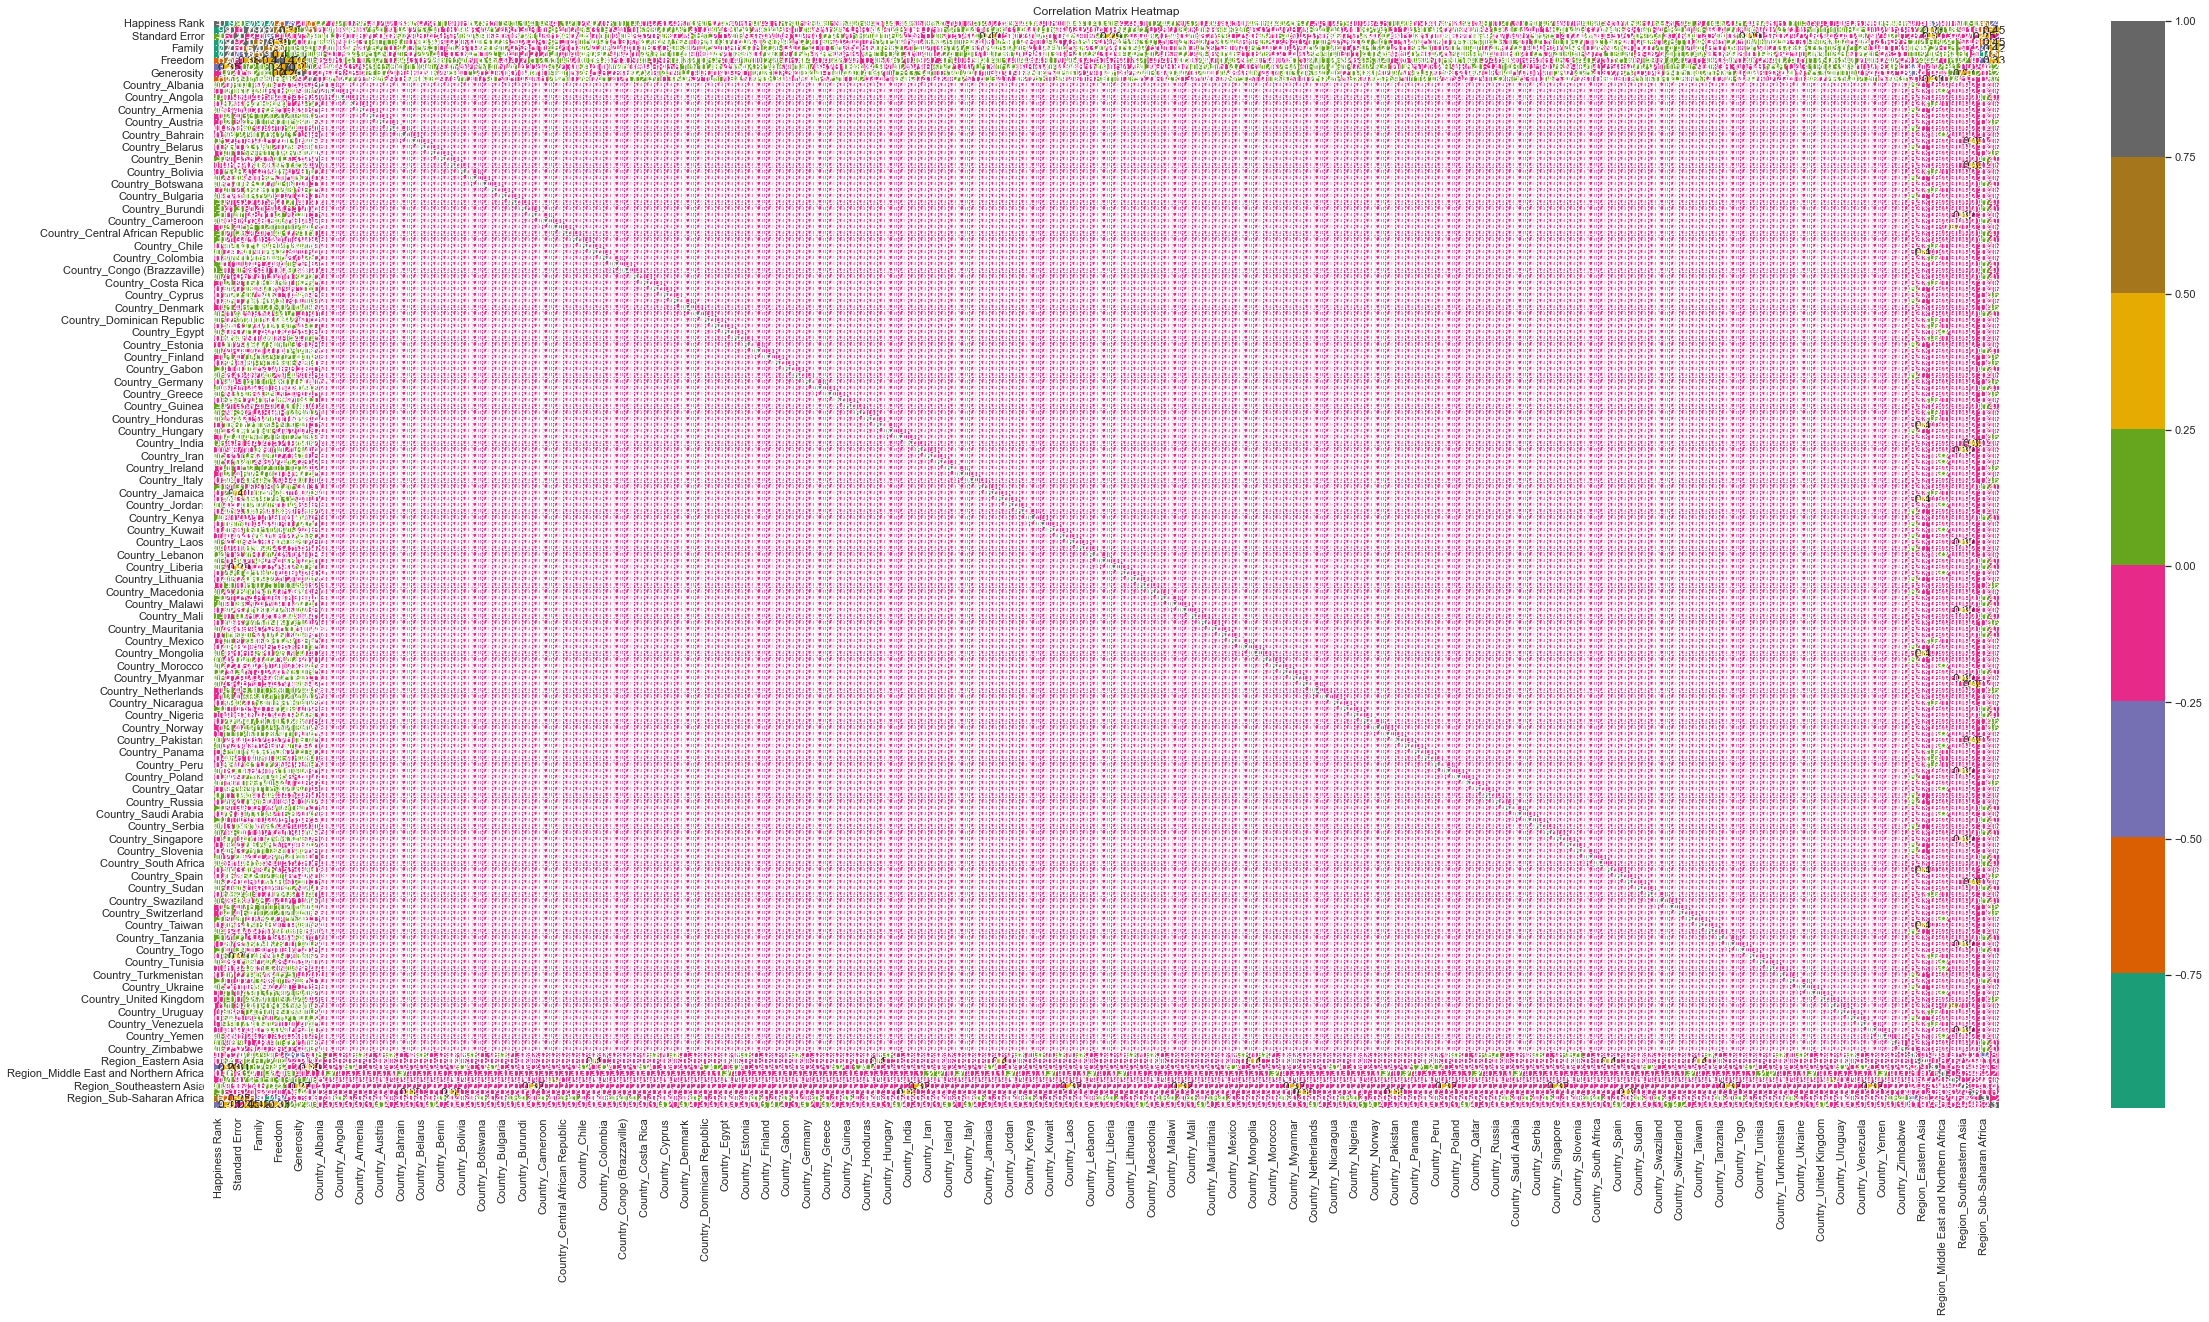

In [82]:
# we will visualize this correlation plotting heatmap
corr = df.corr()

fig, ax = plt.subplots(figsize=(40,20))
sns.heatmap(corr, annot=True, cmap='Dark2', ax=ax)
plt.title('Correlation Matrix Heatmap')
plt.show()

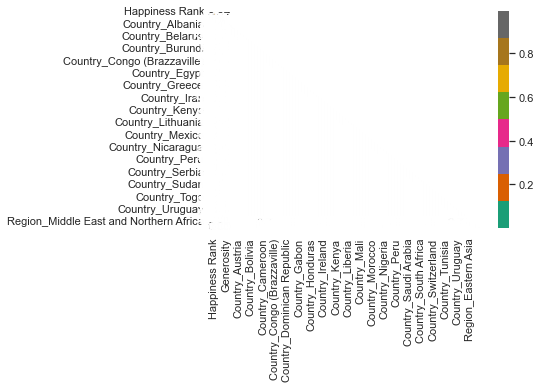

<Figure size 2880x1440 with 0 Axes>

In [83]:
# Calculate the correlation matrix
corr_matrix = df.corr().abs()

# Create a mask to ignore the diagonal values of the matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a list of highly correlated features
high_corr_features = [col for col in corr_matrix.columns if any(corr_matrix[col] > 0.8)]

# Subset the correlation matrix and plot it as a heatmap
sns.heatmap(corr_matrix.loc[high_corr_features, high_corr_features], mask=mask, annot=True, cmap='Dark2')

# Set the figure size
plt.figure(figsize=(40,20))
plt.show()

This heatmap is showing the highly correlated variables in the dataframe

In [84]:
# Define Target and Features variables

target = df['Happiness Score']
features = df.drop('Happiness Score', axis=1)

print("Target variable name: ", target.name)
print("Target variable dimensions: ", target.shape)

print("\nFeatures variables names: ", list(features.columns))
print("Features variables dimensions: ", features.shape)

Target variable name:  Happiness Score
Target variable dimensions:  (158,)

Features variables names:  ['Happiness Rank', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', 'Country_Albania', 'Country_Algeria', 'Country_Angola', 'Country_Argentina', 'Country_Armenia', 'Country_Australia', 'Country_Austria', 'Country_Azerbaijan', 'Country_Bahrain', 'Country_Bangladesh', 'Country_Belarus', 'Country_Belgium', 'Country_Benin', 'Country_Bhutan', 'Country_Bolivia', 'Country_Bosnia and Herzegovina', 'Country_Botswana', 'Country_Brazil', 'Country_Bulgaria', 'Country_Burkina Faso', 'Country_Burundi', 'Country_Cambodia', 'Country_Cameroon', 'Country_Canada', 'Country_Central African Republic', 'Country_Chad', 'Country_Chile', 'Country_China', 'Country_Colombia', 'Country_Comoros', 'Country_Congo (Brazzaville)', 'Country_Congo (Kinshasa)', 'Country_Costa Rica', 'Country_Croatia', 'Count

# Feature Scaling

In [85]:
# feature scaling using StandardScaler

from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit and transform the data using the scaler
scaled_features = scaler.fit_transform(df.drop(['Happiness Score'], axis=1))

# create a new dataframe with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=df.drop(['Happiness Score'], axis=1).columns)

# add the target variable back to the dataframe
scaled_df['Happiness Score'] = df['Happiness Score']

print(scaled_df)

     Happiness Rank  Standard Error  Economy (GDP per Capita)    Family  \
0         -1.721000       -0.805926                  1.435436  1.531119   
1         -1.699075        0.055889                  1.192047  1.531119   
2         -1.677149       -0.854487                  1.252600  1.531119   
3         -1.655224       -0.531526                  1.435436  1.531119   
4         -1.633299       -0.722845                  1.254718  1.531119   
..              ...             ...                       ...       ...   
153        1.633576       -0.774917                 -1.632299 -0.988278   
154        1.655501       -0.662582                 -1.463478 -1.859682   
155        1.677427        0.132534                 -0.478967 -1.746157   
156        1.699352        2.263962                 -1.757563 -1.856565   
157        1.721277        1.134182                 -1.667335 -1.859682   

     Health (Life Expectancy)   Freedom  Trust (Government Corruption)  \
0                    1.54

# Variance Inflation Factor

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# create a dataframe of the features
features = scaled_df.drop(['Happiness Score'], axis=1)

# create a dataframe to store the VIF values
vif = pd.DataFrame()

# calculate the VIF values for each feature and add them to the dataframe
vif["VIF Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

# add the feature names as the index
vif["features"] = features.columns

# sort the DataFrame by descending VIF values
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)

pd.set_option('display.max_rows', None)
print(vif)

       VIF Factor                                features
0             inf                          Happiness Rank
1             inf                Health (Life Expectancy)
2             inf                    Region_Southern Asia
3             inf                Region_Southeastern Asia
4             inf                       Dystopia Residual
5             inf                     Country_Switzerland
6             inf  Region_Middle East and Northern Africa
7             inf                          Standard Error
8             inf      Region_Latin America and Caribbean
9    8.332886e+05                         Country_Comoros
10   5.056586e+05                         Country_Lebanon
11   4.864843e+05                         Country_Belarus
12   2.752856e+05                          Country_Rwanda
13   2.659958e+05                           Country_Ghana
14   1.902441e+05                        Country_Tanzania
15   1.856439e+05                      Country_Tajikistan
16   1.599897e

In [87]:
# Checking value count of target variable
target.value_counts()

7.364    8
3.655    8
5.192    2
4.715    1
4.857    1
4.839    1
4.800    1
4.788    1
4.786    1
4.739    1
4.694    1
4.874    1
4.686    1
4.681    1
4.677    1
4.642    1
4.633    1
4.610    1
4.867    1
4.876    1
5.194    1
5.073    1
5.140    1
5.129    1
5.124    1
5.123    1
5.102    1
5.098    1
5.057    1
4.885    1
5.013    1
5.007    1
4.971    1
4.959    1
4.949    1
4.898    1
4.571    1
7.284    1
4.550    1
3.896    1
4.033    1
3.995    1
3.989    1
3.956    1
3.931    1
3.904    1
3.845    1
4.518    1
3.819    1
3.781    1
3.681    1
3.678    1
3.667    1
3.656    1
4.077    1
4.194    1
4.218    1
4.252    1
4.271    1
4.292    1
4.297    1
4.307    1
4.332    1
4.350    1
4.369    1
4.419    1
4.436    1
4.507    1
4.512    1
4.514    1
4.517    1
4.565    1
5.212    1
7.278    1
6.329    1
6.574    1
6.505    1
6.485    1
6.477    1
6.455    1
6.411    1
6.302    1
6.611    1
6.298    1
6.295    1
6.269    1
6.168    1
6.130    1
6.123    1
6.575    1
6.670    1

# Best Random State

In [88]:
# Lets find the best random state

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Split the data into training and testing sets using different random states
best_random_state = None
best_r2_score = -1
for random_state in range(100):
    X_train, X_test, y_train, y_test = train_test_split(scaled_df.drop('Happiness Score', axis=1), scaled_df['Happiness Score'], test_size=0.2, random_state=random_state)
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    # Check if this random state gives a better R2 score
    if r2 > best_r2_score:
        best_r2_score = r2
        best_random_state = random_state

print("Best random state:", best_random_state)
print("Best R^2 score:", best_r2_score)

Best random state: 84
Best R^2 score: 0.9598669713303157


Best R^2 score is 0.9598669713303157 on Random State 84 

In [89]:
# Lets split the data into test and train data

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=84)

In [90]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(126, 175)
(32, 175)
(126,)
(32,)


# Modelling

In [91]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [92]:
# Import necessary libraries

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

# Linear Regression

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the linear regression model and fit the training data
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate the evaluation metrics
r2_test = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, lr.predict(X_train))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Root squared on test data:", np.sqrt(r2_test))
print("MAE:", mae)
print("MSE:", mse)
print("Root mean square error:", rmse)
print("Root squared on training data:", np.sqrt(r2_train))

Root squared on test data: 0.9797280088526181
MAE: 0.17834309273136176
MSE: 0.051717115737137886
Root mean square error: 0.22741397436643573
Root squared on training data: 1.0


R^2 score for test 97.97%, that means model is a good fit for the data and can accurately predict the target  variable

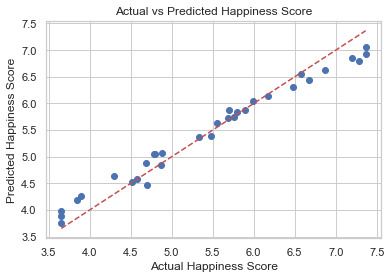

In [94]:
# create a scatter plot of actual vs predicted values by linear regression
plt.scatter(y_test, y_pred)

# add a diagonal line to show perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

# set the title and axis labels
plt.title('Actual vs Predicted Happiness Score')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')

# display the plot
plt.show()

Here we can see model's prediction is reasonably accurate

# L1(Lasso Regression)

In [95]:
# Initialize the Lasso Regression model and fit the training data
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error for test data
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.981172885200026
MAE on test data: 0.11120437486549721
MSE on test data: 0.024261415282673126
RMSE on test data: 0.15576076297538197
Root squared on training data: 0.9807464929573793


R^2 score is 98.12%, that means model is performing quite well,as it explain a large amount of the variance in both the training and test data, and has relatively low errors

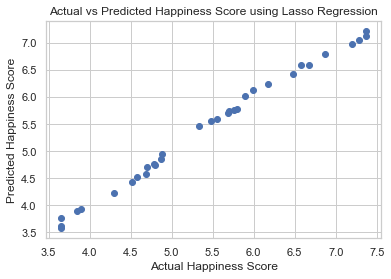

In [96]:
# create a scatter plot of actual vs predicted values by lasso
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train,y_train)

# Predict on test data
lasso_pred = lasso_reg.predict(X_test)

# Plot actual vs predicted
plt.scatter(y_test,lasso_pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs Predicted Happiness Score using Lasso Regression')
plt.show()

This plot of actual vs predicted values also shows a good fit between the predicted and actual values.

# L2(Ridge Regression)

In [97]:
# Initialize the Ridge Regression model and fit the training data 
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)

# Make prediction on both test and train data
y_test_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error for test data
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.9393621249886964
MAE on test data: 0.2251436699442399
MSE on test data: 0.07814052674231825
RMSE on test data: 0.27953627088862415
Root squared on training data: 0.9999999991827763


R^2 score is 93.9%, that means model is performing good,as indicated by the high R-squared values and low error metrics. However, there may still be some room for improvement.

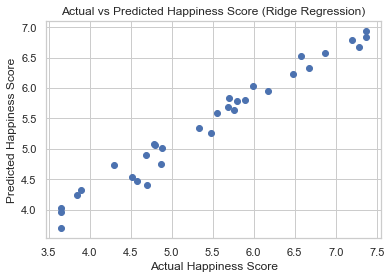

In [98]:
# create a scatter plot of actual vs predicted values by lasso
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)

# Predict on test data
ridge_pred = ridge.predict(X_test)

# Plot actual vs predicted values
plt.scatter(y_test, ridge_pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs Predicted Happiness Score (Ridge Regression)')
plt.show()

This plot is showing a good fit

# ElasticNet

In [99]:
# Initialize the Elastic Net Regression model and fit the training data
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = elastic_net.predict(X_train)
y_test_pred = elastic_net.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error for test data
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.9870672013441695
MAE on test data: 0.0944736868120199
MSE on test data: 0.01666575055657138
RMSE on test data: 0.12909589674568042
Root squared on training data: 0.9857292227558734


R^2 score is 98.7% that means model is performing quite well as indicated by high r squared value and low error metrics.

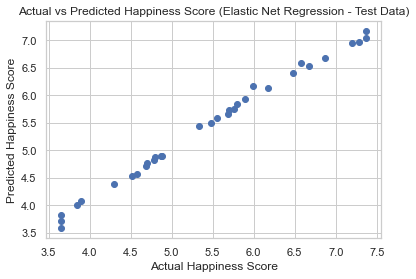

In [100]:
# create a scatter plot of actual and predicted values by elastic net regression

# Plot actual vs predicted values for test data
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs Predicted Happiness Score (Elastic Net Regression - Test Data)')
plt.show()

This plot is also showing a good fit

# Decisison Tree Regression(DTR)

In [101]:
# Initialize the Decision Tree Regression model and fit the training data
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = dtr_model.predict(X_train)
y_test_pred = dtr_model.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error for test data
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.997323588030876
MAE on test data: 0.04462500000000004
MSE on test data: 0.003448937499999998
RMSE on test data: 0.05872765532523837
Root squared on training data: 1.0


R^2 score is 99.7% that means model is performing quite well with test data, as indicated by high r squares value and low error metrics.

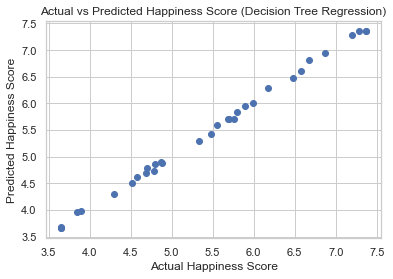

In [102]:
# create a scatter plot of actual and predicted values by Decision tree regression

# Plot actual vs predicted values for test data
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs Predicted Happiness Score (Decision Tree Regression)')
plt.show()

This plot shows the perfect fit 

# Random Forest Regression

In [103]:
# Initialize the Random Forest Regression model and fit the training data
rf = RandomForestRegressor(n_estimators=100, random_state=84)
rf.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error for test data
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.9991095798808491
MAE on test data: 0.025986562499999463
MSE on test data: 0.0011474329718749918
RMSE on test data: 0.03387378000570636
Root squared on training data: 0.9998394259471062


R^2 score is 99.9% that means model performed well in test data.

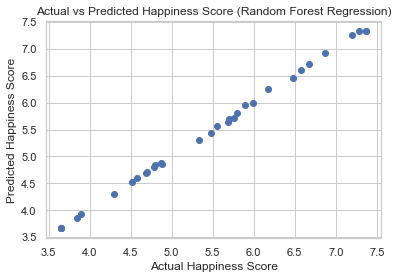

In [104]:
# create a scatter plot of actual and predicted values by Random forest regression

# Plot actual vs predicted values for test data
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs Predicted Happiness Score (Random Forest Regression)')
plt.show()

# Gradient Boosting Regression

In [105]:
# Initialize the Gradient Boosting Regression model and fit the training data
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error for test data
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.9988180437628276
MAE on test data: 0.02753373445025388
MSE on test data: 0.0015231187264034074
RMSE on test data: 0.039027153706149356
Root squared on training data: 0.9999988550597553


R^2 score of test data is 99.8% that mean model performed quite well in the test data

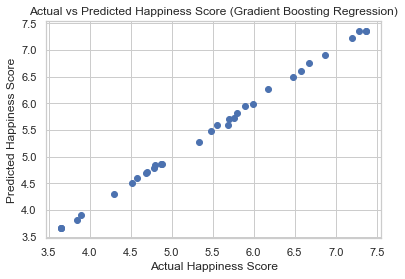

In [106]:
# create a scatter plot of actual and predicted values by Gradient boosting regression

# Plot actual vs predicted values
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs Predicted Happiness Score (Gradient Boosting Regression)')
plt.show()

# XGBoost Regression

In [107]:
# Initialize the XGBoost Regression model and fit the training data
xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05)
xgb.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error for test data
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.9976172805910621
MAE on test data: 0.04609054881334307
MSE on test data: 0.003070472863022376
RMSE on test data: 0.05541184767739094
Root squared on training data: 0.9986990953958412


R^2 score is 99.7% that means model is performing well with test data

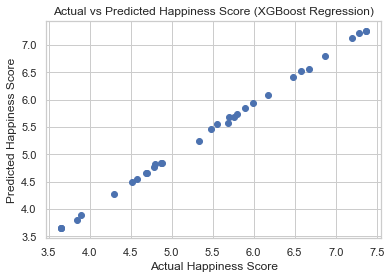

In [108]:
# create a scatter plot of actual and predicted values by GXGBoost regression

# Plot actual vs predicted values
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs Predicted Happiness Score (XGBoost Regression)')
plt.show()

# Cross-validation Score

In [109]:
# Import Necessary Library

from sklearn.model_selection import cross_val_score

# Linear Regression CV Score

In [110]:
# Initialize the linear regression model and fit the training data
lr = LinearRegression()

# Perform cross-validation on the model
cv_scores = cross_val_score(lr, features, target, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ",(diff))

Cross-Validation Scores:  [-12.96113108  -1.74878857  -0.39743652  -0.85399586 -10.39406068]
Mean of CV Scores:  -5.271082540676937
Difference between R2 score and mean CV score:  6.2309495120072524


# Lasso

In [111]:
# Initialize the Lasso model
lasso = Lasso()

# Perform cross-validation on the model
cv_scores = cross_val_score(lasso, features, target, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
lasso.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ",(diff))

Cross-Validation Scores:  [-4.73766606e+01 -7.21085558e+00  5.34426370e-02 -2.13115742e+01
 -5.51783433e+01]
Mean of CV Scores:  -26.20479822571351
Difference between R2 score and mean CV score:  26.333960923203414


# Ridge

In [112]:
# Initialize the Ridge regression model and fit the training data
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(ridge, features, target, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = ridge.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [-9.18077925e+00 -6.84729360e-03  1.50032539e-01 -7.16710098e-01
 -8.20128091e+00]
Mean of CV Scores:  -3.591117002451033
Difference between R2 score and mean CV score:  4.52984187523495


# ElasticNet

In [113]:
# Initialize the ElasticNet regression model and fit the training data
enet = ElasticNet(alpha=1.0, l1_ratio=0.5)
enet.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(enet, features, target, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = enet.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [-37.84546335  -2.34591874   0.30410446  -8.65981355 -36.41130776]
Mean of CV Scores:  -16.99167978862015
Difference between R2 score and mean CV score:  17.58033665475061


# Decision Tree Regression

In [114]:
# Initialize the decision tree regression model with max depth 5
dtr = DecisionTreeRegressor(max_depth=5)

# Perform cross-validation on the model
cv_scores = cross_val_score(dtr, features, target, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
dtr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dtr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [-3.66625669 -0.49805048 -0.62802565 -0.9105971  -3.77823639]
Mean of CV Scores:  -1.896233263759917
Difference between R2 score and mean CV score:  2.8934115576514596


# Random Forest Regression

In [115]:
# Initialize the random forest regression model and fit the training data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(rf, features, target, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [-4.32585224 -0.82099101 -0.51915145 -0.98621463 -4.30127747]
Mean of CV Scores:  -2.190697360763397
Difference between R2 score and mean CV score:  3.1897699750895487


# Gradient Boosting Regression

In [116]:
# Initialize the Gradient Boosting Regression model with default parameters
gbr = GradientBoostingRegressor()

# Perform cross-validation on the model
cv_scores = cross_val_score(gbr, features, target, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
gbr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [-3.44809325 -0.18932123 -0.27807022 -0.35244449 -3.42049298]
Mean of CV Scores:  -1.537684432326666
Difference between R2 score and mean CV score:  2.536502509071524


# XGBoost Regression

In [118]:
import xgboost as xgb

# Initialize the XGBoost regression model
xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05)

# Perform cross-validation on the model
cv_scores = cross_val_score(xgb, features, target, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb.predict(X_test)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

# Calculate the difference between the R2 score and mean CV score
diff = r2 - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [-5.57765664 -0.21578328 -0.20698006 -0.41331312 -2.97525887]
Mean of CV Scores:  -1.877798392641117
Difference between R2 score and mean CV score:  2.875415673232179


Based on the difference between R2 score and mean CV score , we can see that the Gradient Boosting Regression is the best performing model in this case. The smaller the difference, the better the model's generalization performance. 

Gradient Boosting Regression is the best fitted and performing model yet.

Now perform hyperparametertuning for more accuracy.

# Hyperparameter Tuning

Random search CV

In [121]:
# Import the necessary libraries
from sklearn.model_selection import RandomizedSearchCV


# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [2, 3, 4, 5, 6],
    'learning_rate': np.logspace(-4, 0, 50),
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Initialize the Gradient Boosting Regression model
gbr = GradientBoostingRegressor()

# Initialize the Randomized Search Cross-Validation model
gbr_random = RandomizedSearchCV(estimator=gbr, param_distributions=param_grid,
                               n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the Randomized Search Cross-Validation model on the training data
gbr_random.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding R-squared score
print("Best Hyperparameters: ", gbr_random.best_params_)
print("R-squared Score: ", gbr_random.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters:  {'n_estimators': 400, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_depth': 2, 'learning_rate': 0.019306977288832496}
R-squared Score:  0.9985156407677056
[CV] END learning_rate=0.010985411419875584, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.00012067926406393288, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.00012067926406393288, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.0004498432668969444, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.6866488450042998, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.0035564803062231283, max_depth=2, min_sample

R^2 score of this model comes 99.85%, that means this model performs accurately

In [122]:
# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=84)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Gradient Boosting Regression model with the best hyperparameters
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=5)

# Fit the model to the training data
gb.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = gb.predict(X_test_scaled)

# Evaluate the model
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.9991466309292375
Mean Absolute Error: 0.02532448213652752
Mean Squared Error: 0.001099687426093849
Root Mean Squared Error: 0.03316153533981575


R^2 score of test data is 99.9%, that mean models performs accurately with test data too.

Gradient Boosting Regression is the best performed anf fitted model for this problem.

# Save the Model

In [123]:
# Saving this model for prediction in new datset

import pickle

# Save the model to disk
filename = 'happiness_score_model.pkl'
pickle.dump(lasso, open("happiness_score_model.pkl", 'wb'))

We can use this model later by loading it back for prediction 